<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/master/MIE1624_Project_Group14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Sentiment Analysis of Ukraine-Russia War
## 1.1 - MIE1624 Final Project - Group 14
## 1.2 - Group Members

Atoebe Flemming

Daniela Pantoja Cabrera

Dhariya Parmar

Farhan Wadia

Ganesh Manyam

Geet Patel

Ruohan Chen

## 1.3 - Setup
To run this notebook, download the following files and place them in the same working folder as this notebook. The links will only be accessible until May 2, 2023. If using Google Colab, it is suggested to download each file and then upload all of them to the session storage using Colab's GUI.

File Name | File Link
---|---
`Raw_Tweet_Data.csv` | https://utoronto-my.sharepoint.com/:x:/g/personal/geet_patel_mail_utoronto_ca/EQWZyyVXbOVMmfU59z6_XpUBQ9sBuoNh2pTg2SisCRCRJg?e=jMnHls
`russian_invasion_of_ukraine.csv` | https://utoronto-my.sharepoint.com/:x:/g/personal/geet_patel_mail_utoronto_ca/ESgjg034wdVAvKK8pTSWgU4BSOd44Dm_4sTb93kq30Zawg?e=9u6w1p
`sentiment_analysis(eng_filtered).csv` | https://utoronto-my.sharepoint.com/:x:/g/personal/geet_patel_mail_utoronto_ca/EeO0uv0UHXdOrV0x0RxsUIMBqf1-f_21GsbiZcVtoLPg2w?e=ruwqSM
`russia_ukraine_reddit_comments.csv` | https://utoronto-my.sharepoint.com/:x:/g/personal/geet_patel_mail_utoronto_ca/EZUSpKDDf-ZAo67C67LD4a4BozSOSkEy818FfgLyuSSFUA?e=2cwVMZ
`russia_ukraine_rss_data.csv` | https://utoronto-my.sharepoint.com/:x:/g/personal/geet_patel_mail_utoronto_ca/EQET-vTfwKpBh5T8lS8nNRQBX3qnp2I1dWjeRcvyvMH_1w?e=Owvo1T



# 2 - Sentiment Model Training

## 2.1 - Cleaning current Working Directory

Run this block only if using Colab

In [ ]:
# The code below deletes the current runtime of this notebook, 
# so the following code cells will not be compiled even if you do "Runtime>Run all"
# Alternate suggestion: Use "Runtime>Run after"
# The purpose of this implementation is to have a fresh clone of our github repo
# everytime we run the notebook as our current working directory

# from google.colab import runtime
# runtime.unassign()

## 2.2 - Setting Up the Environment

In [ ]:
# cloning our Project Repo
#! git clone --single-branch --branch branch_Dhairya https://github.com/farhanwadia/nlp_g14.git

Cloning into 'nlp_g14'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 8), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (49/49), 109.74 KiB | 231.00 KiB/s, done.


In [ ]:
# changing the current directory to our Project Repo "nlp_g14", if not already done
#%cd nlp_g14

/content/nlp_g14


In [ ]:
# importing a Python Module "langdetect" which is used for detecting the language of a string variable
# We'll be using this to filter out tweets and post which are not in english
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=2e6aa080ee58e1c61442408695916d23d4ef90844f646c9ab454cd462637af49
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


## 2.3 - Importing Data

In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time

In [ ]:
# importing the twitter training data provided to us in "sentiment_analysis.csv" 
# file as a pandas dataframe
#df = pd.read_csv('sentiment_analysis.csv')
#df

In [ ]:
# we do not need the "ID" column for our sentiment analysis so let's drop that
#df.drop(columns = ['ID'], inplace = True)
#df.head()

In [ ]:
# dropping dupicate tweets/posts (observe the difference in the shape of the dataframe after running this)
#df.drop_duplicates(subset='text',inplace=True)
#df

In [ ]:
# generating a column which indicates the language of the tweet/post
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(tweet):
  try:
    return detect(tweet)
  except:
    return None

#df['language'] = df['text'].apply(detect_language)
#df

In [ ]:
# filtering out tweets/posts that are not in english (observe the difference in the shape of the dataframe after running this)
#df = df[df['language'] == 'en']
#df

In [ ]:
# Creating a checkpoint since cleaning the dataframe till this cell takes long in every run
#df.to_csv('sentiment_analysis(eng_filtered).csv')

## 2.4 - Checkpoint Reload

In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # ignores warnings

# to make sure our plots are inline with the code cells
%matplotlib inline 

np.random.seed(0) # to have the same results every time
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
df

,Unnamed: 0,text,label,language
0,0,Josh Jenkins is looking forward to TAB Breeder...,1,en
1,1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,en
2,2,"RT @PEPalerts: This September, @YESmag is taki...",1,en
3,3,"RT @david_gaibis: Newly painted walls, thanks ...",1,en
4,4,RT @CedricFeschotte: Excited to announce: as o...,1,en
...,...,...,...,...
473942,550386,@goddesses_o I can't stop watching her...mm. M...,0,en
473943,550387,Poor old Tom Odell doesn't look like he would ...,0,en
473944,550388,#antsmasher I smashed 7 ants in this awesome ...,1,en
473945,550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,en


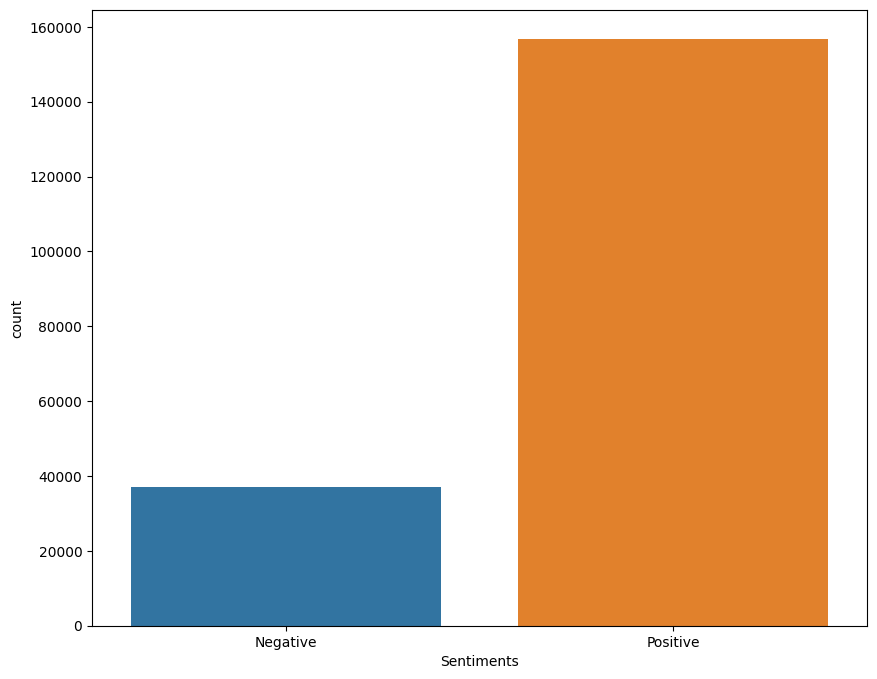

In [ ]:
# let's look at the distribution of our classes ({0: 'Negative}, {1: 'Positive'})
fig, ax = plt.subplots(figsize = (10, 8))
sns.countplot(x = df['label'])
x_labels = ['Negative', 'Positive']
ax.set_xticklabels(x_labels)
plt.xlabel('Sentiments')
plt.show()

As of now our data set is unbalanced with more positive tweets than negative tweets. Moreover the sheer amount of tweets we have is too much (~ 500,000), training models with this much data will be very slow. The following cell selects equal number (5000) of random positive and negative tweets to form a balanced dataset of 10,000 tweets

In [ ]:
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000)) #randomly selecting the index 5000 negative tweets/posts
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000)) #randomly selecting the index 5000 positive tweets/posts
idx = np.concatenate((negative_idx, positive_idx)) # concatenating the indexes, we don't need to shuffle the indexes since sci-kit learn's train_test_split takes care of it
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1) # filtering out the indexes not present in idx
ttr_data

## 2.5 - Splitting Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)

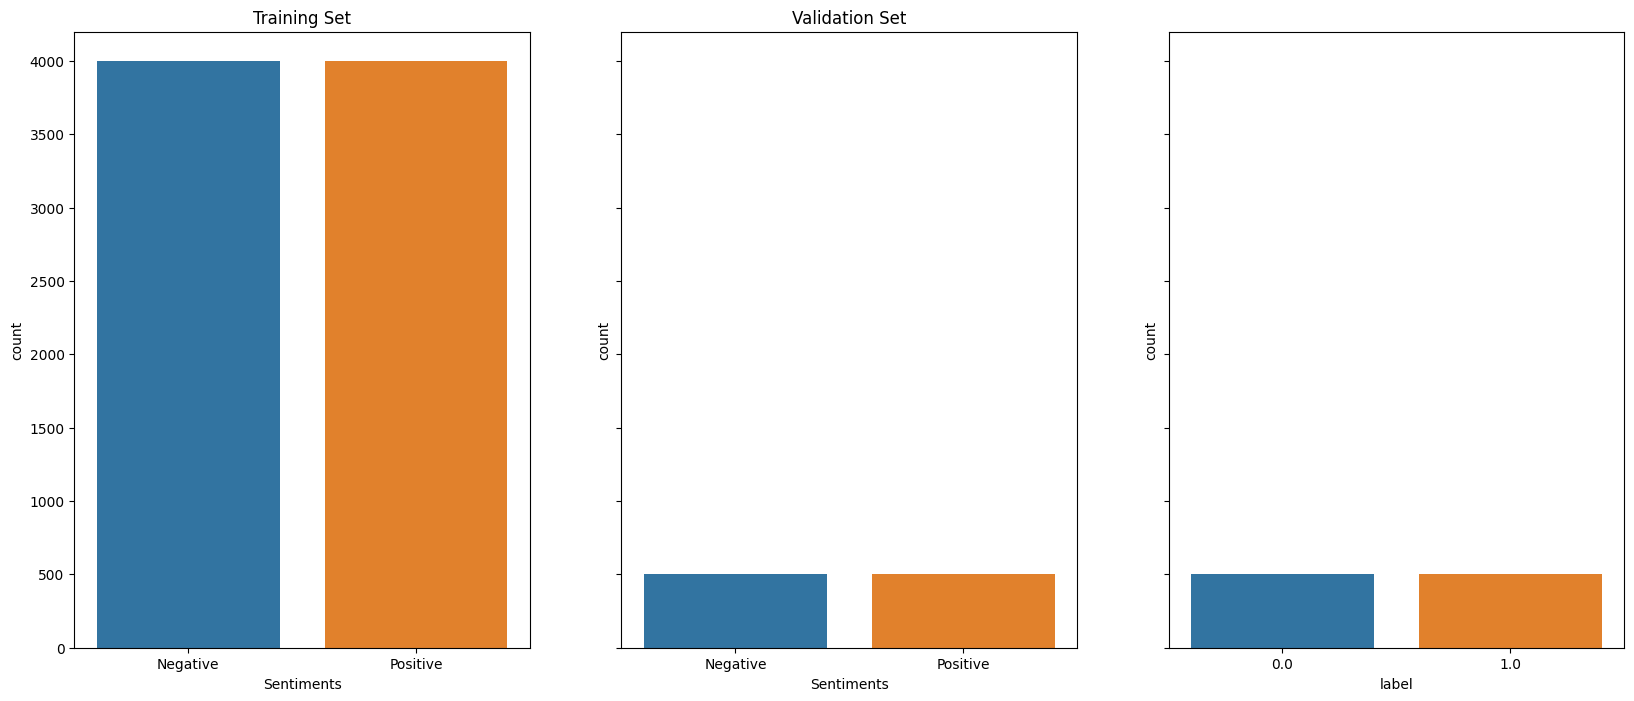

In [ ]:
# let's check if both splits are balanced or not
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (20,8))
x_labels = ['Negative', 'Positive']
sns.countplot(x = y_train, ax = ax1)
ax1.set_title('Training Set')
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('Sentiments')
sns.countplot(x = y_test, ax = ax2)
ax2.set_title('Test Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
sns.countplot(x = y_val, ax = ax3)
ax2.set_title('Validation Set')
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Sentiments')
plt.show()

## 2.6 - Text Pre-Processing

In [ ]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

# defining a preprocessing function to be later used in conjunction with the Tfidf Vectorizer from Sci-kit Learn
def PreProcessor(text):
  lemmatizer = WordNetLemmatizer() 
  stopword = stopwords.words('english')
  text = BeautifulSoup(text, 'html.parser').get_text() #removing html tags
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### 2.6.1 - Word Clouds

(-0.5, 399.5, 199.5, -0.5)

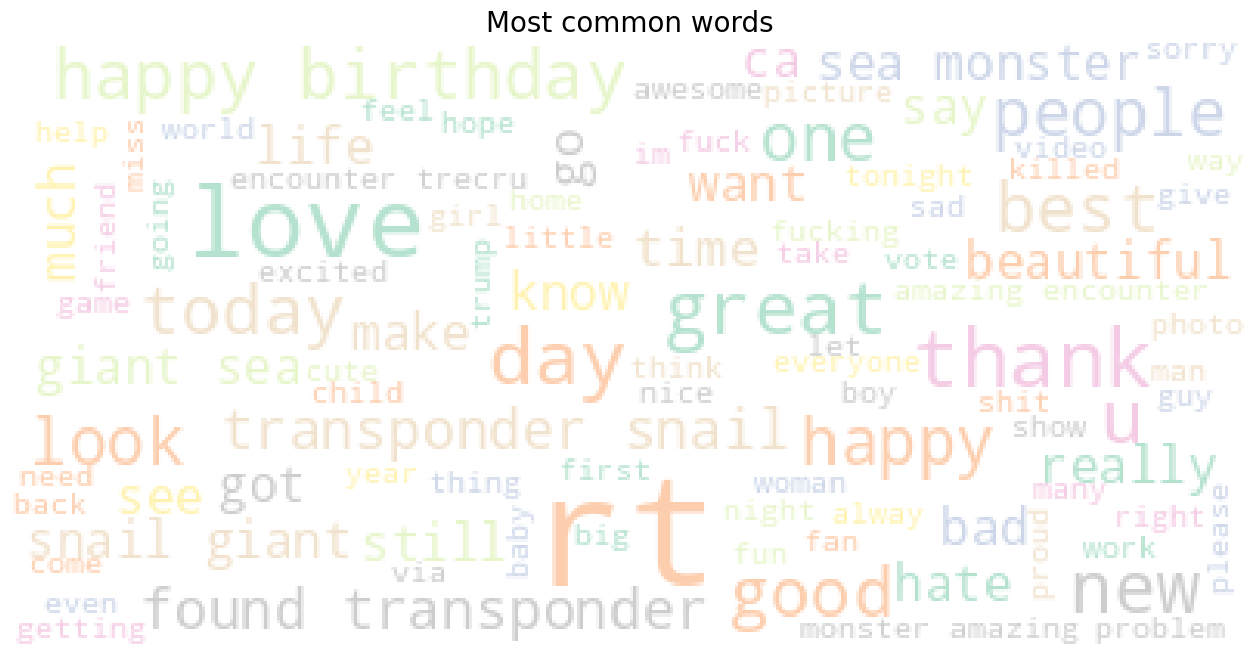

In [ ]:
# let's checkput the word cloud of the tweets we have
from wordcloud import WordCloud
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(ttr_data['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

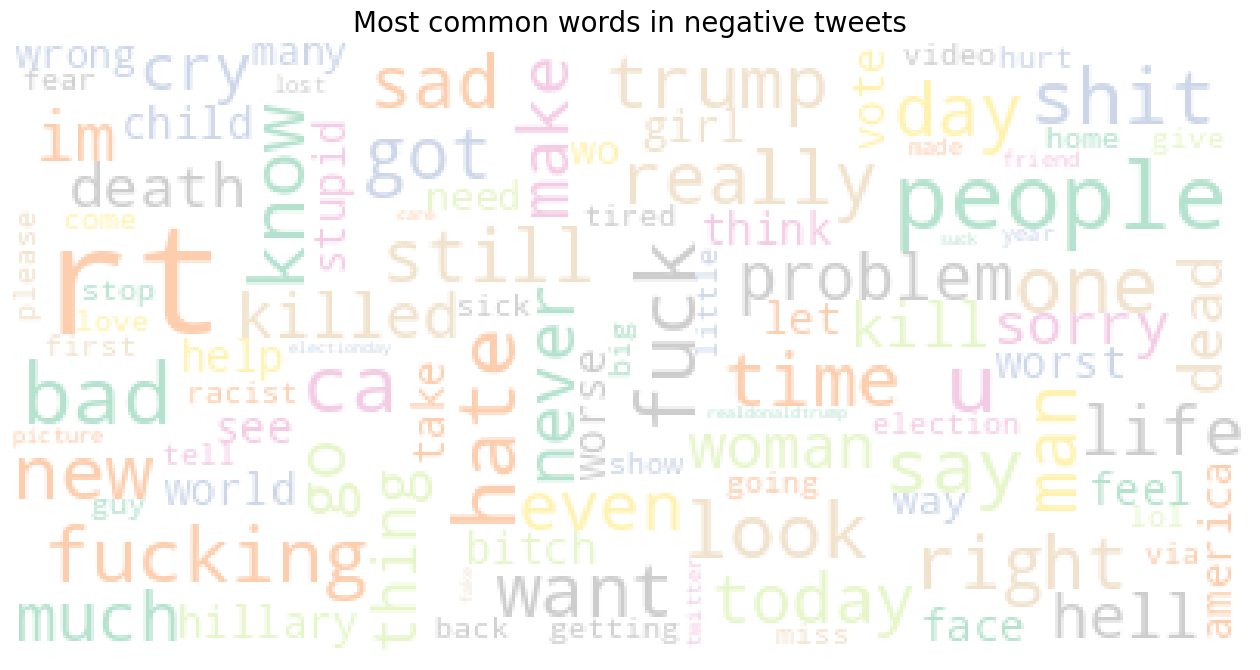

In [ ]:
# let's check the word cloud of negative tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 0]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in negative tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

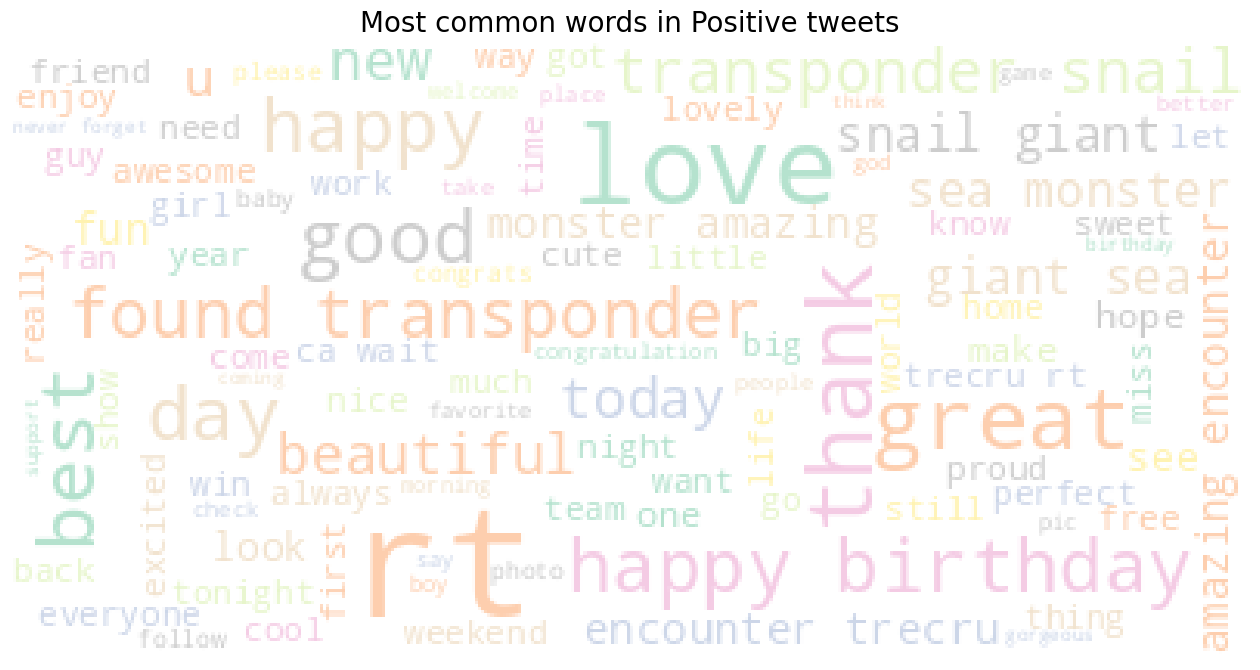

In [ ]:
# let's check the word cloud of positive tweets
word_cloud = " ".join(ttr_data[ttr_data['label'] == 1]['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

## 2.7 - TF-IDF Feature Extraction

In [ ]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

# defining a TF-IDF vectorizing function which return the extracted TF-IDF feature in a dataframe
def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X
'''

In [ ]:
'''
Vectorizer = TfidfVectorizer(analyzer = PreProcessor) # PreProcessor function we defined earlier used as an override to TfidfVectorizer's default pre-processing function
Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
X_train = Vectorize(X_train['text'], Fitted_Vectorizer) # transforming X_train accordingly
'''

In [ ]:
'''
# after observing the resulting X_train features, it was found that it still has 
# words from other languages so this cell attempts to drop those features

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']
'''

In [ ]:
#len(english_words)

2798

In [ ]:
#X_train = X_train[english_words]

In [ ]:
#X_train # observe the difference in X_train.shape

,aaronspears,abcnetwork,abducted,abort,aborted,abortion,abpmarathon,absolutely,accessory,accomplished,...,youarehere,youlivewecare,youngvisionar,youngvnew,younow,youranonnews,youth,youthful,youthweeks,youtubers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Applying the same pre-processing to Validation Set
#X_val = Vectorize(X_val['text'], Fitted_Vectorizer)

In [ ]:
#X_val = X_val[english_words]

In [ ]:
#X_val

,aaronspears,abcnetwork,abducted,abort,aborted,abortion,abpmarathon,absolutely,accessory,accomplished,...,youarehere,youlivewecare,youngvisionar,youngvnew,younow,youranonnews,youth,youthful,youthweeks,youtubers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.8 - Search for an Optimum Model

Since we have a very large number of features, we are going to apply Principal Component Analysis as the first step of our pipeline and different classifiers as the second step.

The following cell defines different Sci-Kit Learn Classifier models and their own parameter search space to be used in GridSearchCV to find the optimum hyperparameter combination for the classifier based on the f1_score of validation sets in a 5-fold Cross Validation Strategy

At the end a function is defined which helps to visualize the results of our hyparameter search

In [ ]:
'''
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pca = PCA()

kNN = KNeighborsClassifier()
kNN_param_grid = {'pca__n_components': [500, 1500],
                  'kNN__n_neighbors': [3, 5, 7], 
                  'kNN__p': [1, 2]}

lr = LogisticRegression(random_state = 4, max_iter = 1000)
lr_param_grid = {'pca__n_components': [500, 1500],
                 'lr__C': [0.1, 0.5, 1, 5], 
                 'lr__solver': ['newton-cg','lbfgs','liblinear','sag']}

svc = SVC(random_state = 4)
svc_param_grid = {'pca__n_components': [500, 1500],
                  'svc__C': [0.1, 0.5, 1, 5], 
                  'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
                  'svc__degree': [2,3,4]}

xgb = XGBClassifier(random_state = 4)
xgb_param_grid = {'pca__n_components': [500, 1500], 
                  'xgb__max_depth': [10, 20, 50],
                  'xgb__n_estimators': [50, 100]}

dtr = DecisionTreeClassifier(random_state = 4)
dtr_param_grid = {'pca__n_components': [500, 1500],
                  'dtr__criterion': ['gini', 'entropy', 'log_loss'], 
                  'dtr__max_depth': [10, 20, 50]}

rf = RandomForestClassifier(random_state = 4)
rf_param_grid = {'pca__n_components': [500, 1500],
                 'rf__n_estimators': [50, 100],
                 'rf__criterion': ['gini', 'entropy', 'log_loss'],
                 'rf__max_depth': [10, 20, 50]}

mlp = MLPClassifier(random_state = 4, max_iter = 1000)
mlp_param_grid = {'pca__n_components': [500, 1500],
                  'mlp__hidden_layer_sizes': [[100, 50], [50, 50]],
                  'mlp__activation': ['logistic', 'tanh', 'relu']}


models_dict = {'kNN': (kNN, kNN_param_grid),
               'lr': (lr, lr_param_grid),
               'svc': (svc, svc_param_grid),
               'xgb': (xgb, xgb_param_grid),
               'dtr': (dtr, dtr_param_grid),
               'rf': (rf, rf_param_grid),
               'mlp': (mlp, mlp_param_grid)}

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

    best_model = results.best_estimator_
    best_model.fit(X_train, y_train.values.ravel())
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)   
    print("model training score: %.3f" % f1_score(y_train.values, y_train_pred))
    print("model vaidation score: %.3f" % f1_score(y_val.values, y_val_pred))
'''

The following cells show the hyperparameter search results for each of the classifiers defined, (a for loop could have been written for the following cells but we didn't have the resources to run the notebook for that long so we have separately searched the optimum hyperparameter combination for each classifer)

In [ ]:
'''
# kNN Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('kNN', kNN)])
gridsearch = GridSearchCV(pipe, kNN_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# Logistic Regression
pipe = Pipeline(steps=[('pca', pca),
                       ('lr', lr)])
gridsearch = GridSearchCV(pipe, lr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# Support Vector Machines
pipe = Pipeline(steps=[('pca', pca),
                       ('svc', svc)])
gridsearch = GridSearchCV(pipe, svc_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# XGBoost Classifer
pipe = Pipeline(steps=[('pca', pca),
                       ('xgb', xgb)])
gridsearch = GridSearchCV(pipe, xgb_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# Decision Tree Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('dtr', dtr)])
gridsearch = GridSearchCV(pipe, dtr_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# Random Forests Classifier
pipe = Pipeline(steps=[('pca', pca),
                       ('rf', rf)])
gridsearch = GridSearchCV(pipe, rf_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

In [ ]:
'''
# Neural Networks (Multi Layer Perceptron Classifier)
pipe = Pipeline(steps=[('pca', pca),
                       ('mlp', mlp)])
gridsearch = GridSearchCV(pipe, mlp_param_grid, scoring = 'f1')
gridsearch.fit(X_train,y_train.values.ravel())
print_results(gridsearch)
'''

## 2.9 - Optimum Model

In [ ]:
# Applying the same pre-processing to Validation Set
#X_test = Vectorize(X_test['text'], Fitted_Vectorizer)

In [ ]:
#X_test = X_test[english_words]

According the f1 scores of training and validation sets our best model is the MLPClassifier model (Neural Networks) with parameter comnbination shown in the folllowing code cell

In [ ]:
'''
# Best Model Pipeline
best_model = Pipeline(steps=[('pca', PCA(n_components = 1500)),
                             ('mlp', MLPClassifier(random_state = 4, 
                                                   max_iter = 1000, 
                                                   activation = 'relu', 
                                                   hidden_layer_sizes = [100, 50]))])
best_model.fit(X_train, y_train.values.ravel())
'''

Pipeline(steps=[('pca', PCA(n_components=1500)),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000,
                               random_state=4))])

In [ ]:
'''
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

print("Training Set F1 Score: ", f1_score(y_train.values, y_train_pred))
print("Validation Set F1 Score: ", f1_score(y_val.values, y_val_pred))
print("Test Set F1 Score: ", f1_score(y_test.values, y_test_pred))
'''

Training Set F1 Score:  0.7824060588406642
Validation Set F1 Score:  0.572827417380661
Test Set F1 Score:  0.5629820051413882


# 3 - Sentiment Classification

## 3.1 - Data Collection

### 3.1.1 - Twitter Scraping

In [ ]:
#import pandas as pd
#import json
#import snscrape.modules.twitter as sntwitter

In [ ]:
'''
def hashscrape(query):    
    # Creating list to append tweet data to
    #tweets_list2 = []
    # MetaData_List = []
    tweetraw=[]
    tweetuser = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i>5000:
            break
        tweetraw.append(tweet)
        tweetuser.append(tweet.user.username)
        # print(type(tweet))
        # tweets_list2.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang, tweet.likeCount, tweet.retweetCount, tweet.hashtags])
        # MetaData_List.append([tweet.lang, tweet.likeCount, tweet.retweetCount, tweet.hashtags])
    # Creating a dataframe from the tweets list above
    # tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Language','Likes', 'Retweets', 'Hashtags'])
    # MetaData = pd.DataFrame(MetaData_List, columns=['Language','Likes', 'Retweets', 'Hashtags'])
    # Combine lists into a dictionary
    tweetrawd = pd.DataFrame(tweetraw)
    tweetuserd = pd.DataFrame(tweetuser)
    rawdata = pd.concat([tweetrawd, tweetuserd], axis=1)
    return rawdata
'''

In [ ]:
'''
query = ['Russia_Ukraine since:2022-02-24 until:2022-02-28',
         'Russia_Ukraine since:2022-03-15 until:2022-03-19',
         'Russia_Ukraine since:2022-03-28 until:2022-04-16',
         'Russia_Ukraine since:2022-09-18 until:2022-09-23',
         'Russia_Ukraine since:2022-10-07 until:2022-10-13',
         'Russia_Ukraine since:2022-11-09 until:2022-11-14',
         'Russia_Ukraine since:2022-12-20 until:2022-12-23',
         'Russia_Ukraine since:2023-02-19 until:2023-02-22',]#'dede since:2023-03-03 until:2023-03-04'
'''

In [ ]:
#dfs=[]
#for i in range(len(query)):
#    dfs.append(hashscrape(query[i]))

# concatenate all dataframes in the list
#result = pd.concat(dfs, ignore_index=True)

In [ ]:
#result.to_csv('Raw_Tweet_Data.csv', sep=',', index=False)

In [ ]:
TweetData = pd.read_csv('Raw_Tweet_Data.csv')
TweetData.head()

c:\Users\ganes\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,0
0,https://twitter.com/NatasaJevtovic/status/1498...,2022-02-27 23:59:43+00:00,Ex-Nato head says #Putin wanted to join allian...,Ex-Nato head says #Putin wanted to join allian...,1498085470374445056,"{'username': 'NatasaJevtovic', 'id': 489482046...",0,0,0,0,...,NaN,"[{'username': 'irismarketiq', 'id': 1471155981...",NaN,NaN,"['Putin', 'Nato', 'RussiaUkraine', 'RussiaUkra...",NaN,{'title': 'Ex-Nato head says Putin wanted to j...,NaN,NaN,NatasaJevtovic
1,https://twitter.com/TheRoostergod/status/14980...,2022-02-27 23:59:38+00:00,I recommend reading about the first &amp; seco...,I recommend reading about the first &amp; seco...,1498085448392007686,"{'username': 'TheRoostergod', 'id': 4050704716...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheRoostergod
2,https://twitter.com/34istanbul571/status/14980...,2022-02-27 23:59:34+00:00,Russia-Ukraine tensions: Latest updates from o...,Russia-Ukraine tensions: Latest updates from o...,1498085431770034176,"{'username': '34istanbul571', 'id': 1451340639...",0,0,0,0,...,NaN,"[{'username': 'YouTube', 'id': 10228272, 'disp...",NaN,NaN,NaN,NaN,{'title': 'Russia-Ukraine tensions: Latest upd...,NaN,NaN,34istanbul571
3,https://twitter.com/yesliaaaa/status/149808541...,2022-02-27 23:59:30+00:00,"Omg, im so sad for him. Happy birthday handsom...","Omg, im so sad for him. Happy birthday handsom...",1498085415055593479,"{'username': 'yesliaaaa', 'id': 494917055, 'di...",0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesliaaaa
4,https://twitter.com/Pagetamil/status/149808540...,2022-02-27 23:59:27+00:00,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,1498085402594484228,"{'username': 'Pagetamil', 'id': 2503036010, 'd...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagetamil


### 3.1.2 - Reddit Scraping

The purpose of this section is to scrape data from Reddit related to the Ukraine-Russia war to use for our project

#### 3.1.2.1 - Setup

Begin by curating the results from searching "russia ukraine war" on Reddit (https://www.reddit.com/search/?q=russia%20ukraine%20war) to ensure that a diverse set of posts related to the conflict (positive, neutral, and negative sentiments) with sufficient number of comments are selected. Through this curation, the 22 posts linked below were identified for scraping.

- https://www.reddit.com/r/MapPorn/comments/11rxpnv/where_every_country_stands_on_the_russiaukraine/
- https://www.reddit.com/r/TooAfraidToAsk/comments/10ltzhs/currently_confused_on_the_whole_russiaukraine_war/
- https://www.reddit.com/r/ThatsInsane/comments/116zlt6/mine_from_russiaukraine_war_blows_up_on_batumi/
- https://www.reddit.com/r/JordanPeterson/comments/115wetc/the_west_is_escalating_the_russiaukraine_war_make/
- https://www.reddit.com/r/Anarcho_Capitalism/comments/11zk8a4/the_libertarian_position_on_the_russiaukraine_war/
- https://www.reddit.com/r/conspiracy/comments/11dqgru/its_hard_to_know_who_to_root_for_in_the_russia/
- https://www.reddit.com/r/inthenews/comments/11r9jf1/desantis_calls_russiaukraine_war_a_territorial/
- https://www.reddit.com/r/worldnews/comments/1012wys/india_again_expresses_grave_concern_over/
- https://www.reddit.com/r/worldnews/comments/115pq8k/netherlands_orders_russian_diplomats_to_leave/
- https://www.reddit.com/r/france/comments/11atjnp/what_does_average_french_think_of_russia_ukraine/
- https://www.reddit.com/r/anime_titties/comments/1042gn1/russiaukraine_war_live_putin_calls_for_36hour/
- https://www.reddit.com/r/Africa/comments/11knizh/is_africa_still_neutral_a_year_into_the_ukraine/
- https://www.reddit.com/r/worldnews/comments/zq7dln/russiaukraine_war_vladimir_putin_targets_traitors/
- https://www.reddit.com/r/AskARussian/comments/u6e7sv/war_in_ukraine_the_megathread_part_3/
- https://www.reddit.com/r/news/comments/t003vl/russia_declares_war_on_ukraine_reports_of/
- https://www.reddit.com/r/UkraineAnxiety/comments/u3ny3p/ukrainerelated_anxiety_megathread_reassurance/
- https://www.reddit.com/r/UkrainianConflict/comments/11zdigz/desantis_brands_putin_a_war_criminal_who_should/
- https://www.reddit.com/r/interestingasfuck/comments/t4cdik/in_1996_ukraine_handed_over_nuclear_weapons_to/
- https://www.reddit.com/r/nextfuckinglevel/comments/t5lp3g/antiwar_protest_in_st_petersburg_russia_march_2/
- https://www.reddit.com/r/worldnews/comments/117526s/zelensky_if_china_allies_itself_with_russia_there/
- https://www.reddit.com/r/worldnews/comments/11ad8p2/india_abstains_as_un_calls_for_russia_to_leave/
- https://www.reddit.com/r/worldnews/comments/1183r5w/putin_falsely_claims_it_was_west_that_started_the/

In [ ]:
urls = ['https://www.reddit.com/r/MapPorn/comments/11rxpnv/where_every_country_stands_on_the_russiaukraine/',
'https://www.reddit.com/r/TooAfraidToAsk/comments/10ltzhs/currently_confused_on_the_whole_russiaukraine_war/',
'https://www.reddit.com/r/ThatsInsane/comments/116zlt6/mine_from_russiaukraine_war_blows_up_on_batumi/',
'https://www.reddit.com/r/JordanPeterson/comments/115wetc/the_west_is_escalating_the_russiaukraine_war_make/',
'https://www.reddit.com/r/Anarcho_Capitalism/comments/11zk8a4/the_libertarian_position_on_the_russiaukraine_war/',
'https://www.reddit.com/r/conspiracy/comments/11dqgru/its_hard_to_know_who_to_root_for_in_the_russia/',
'https://www.reddit.com/r/inthenews/comments/11r9jf1/desantis_calls_russiaukraine_war_a_territorial/',
'https://www.reddit.com/r/worldnews/comments/1012wys/india_again_expresses_grave_concern_over/',
'https://www.reddit.com/r/worldnews/comments/115pq8k/netherlands_orders_russian_diplomats_to_leave/',
'https://www.reddit.com/r/france/comments/11atjnp/what_does_average_french_think_of_russia_ukraine/',
'https://www.reddit.com/r/anime_titties/comments/1042gn1/russiaukraine_war_live_putin_calls_for_36hour/',
'https://www.reddit.com/r/Africa/comments/11knizh/is_africa_still_neutral_a_year_into_the_ukraine/',
'https://www.reddit.com/r/worldnews/comments/zq7dln/russiaukraine_war_vladimir_putin_targets_traitors/',
'https://www.reddit.com/r/AskARussian/comments/u6e7sv/war_in_ukraine_the_megathread_part_3/',
'https://www.reddit.com/r/news/comments/t003vl/russia_declares_war_on_ukraine_reports_of/',
'https://www.reddit.com/r/UkraineAnxiety/comments/u3ny3p/ukrainerelated_anxiety_megathread_reassurance/',
'https://www.reddit.com/r/UkrainianConflict/comments/11zdigz/desantis_brands_putin_a_war_criminal_who_should/',
'https://www.reddit.com/r/interestingasfuck/comments/t4cdik/in_1996_ukraine_handed_over_nuclear_weapons_to/',
'https://www.reddit.com/r/nextfuckinglevel/comments/t5lp3g/antiwar_protest_in_st_petersburg_russia_march_2/',
'https://www.reddit.com/r/worldnews/comments/117526s/zelensky_if_china_allies_itself_with_russia_there/',
'https://www.reddit.com/r/worldnews/comments/11ad8p2/india_abstains_as_un_calls_for_russia_to_leave/',
'https://www.reddit.com/r/worldnews/comments/1183r5w/putin_falsely_claims_it_was_west_that_started_the/']

#### 3.1.2.2 - Scraping

Use [PRAW](https://praw.readthedocs.io/en/stable/) to scrape the comments from each Reddit post in `urls`

In [ ]:
!pip install praw

In [ ]:
'''
import praw
import copy
# Refer to https://towardsdatascience.com/scraping-reddit-data-1c0af3040768 for setup steps
reddit = praw.Reddit(client_id='XJRwklwrK6R4VOOn5ZxJHg', client_secret='uIqVxOFNJyGIDIdloNN-zWxbSV6kTQ', user_agent='G14Bot/0.0.1')

results = []

for url in urls:
    data = {}
    submission = reddit.submission(url=url)
    
    # Iterate over comments of post
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        #Begin by adding the post specific fields to keep with all comments of the post
        data['Post - Author'] = submission.author
        data['Post - Date'] = submission.created_utc
        data['Post - Is Distinguished'] = submission.distinguished
        data['Post - Is Edited'] = submission.edited
        data['Post - Is Original Content'] = submission.edited
        data['Post - Is Locked'] = submission.locked
        data['Post - Name'] = submission.name
        data['Post - num_comments'] = submission.num_comments
        data['Post - over_18'] = submission.over_18
        data['Post - Permalink'] = "http://www.reddit.com" + submission.permalink
        data['Post - Score'] = submission.score
        data['Post - Is Spoiler'] = submission.spoiler
        data['Post - Is Stickied'] = submission.stickied
        data['Post - Subreddit'] = submission.subreddit
        data['Post - Title'] = submission.title
        data['Post - Upvote Ratio'] = submission.upvote_ratio
        
        # Add the comment specific fields
        data["ID"] = comment
        data["Author"] = comment.author
        data["Date"] = comment.created_utc
        data["Parent ID Prefix"] = str(comment.parent_id).split("_")[0] # Tier of comment
        data["Parent ID"] = str(comment.parent_id).split("_")[1]
        data["Is Distinguished"] = comment.distinguished
        data["Is Edited"] = comment.edited
        data["Is Stickied"] = comment.stickied
        data["Permalink"] = "http://www.reddit.com" + comment.permalink
        data["Score"] = comment.score
        data["Body"] = comment.body
        
        # Append data to results 
        results.append(copy.deepcopy(data))
    
    print("Added", url)  
'''

Added https://www.reddit.com/r/MapPorn/comments/11rxpnv/where_every_country_stands_on_the_russiaukraine/
Added https://www.reddit.com/r/TooAfraidToAsk/comments/10ltzhs/currently_confused_on_the_whole_russiaukraine_war/
Added https://www.reddit.com/r/ThatsInsane/comments/116zlt6/mine_from_russiaukraine_war_blows_up_on_batumi/
Added https://www.reddit.com/r/JordanPeterson/comments/115wetc/the_west_is_escalating_the_russiaukraine_war_make/
Added https://www.reddit.com/r/Anarcho_Capitalism/comments/11zk8a4/the_libertarian_position_on_the_russiaukraine_war/
Added https://www.reddit.com/r/conspiracy/comments/11dqgru/its_hard_to_know_who_to_root_for_in_the_russia/
Added https://www.reddit.com/r/inthenews/comments/11r9jf1/desantis_calls_russiaukraine_war_a_territorial/
Added https://www.reddit.com/r/worldnews/comments/1012wys/india_again_expresses_grave_concern_over/
Added https://www.reddit.com/r/worldnews/comments/115pq8k/netherlands_orders_russian_diplomats_to_leave/
Added https://www.reddi

In [ ]:
'''
import pandas as pd

df = pd.DataFrame.from_records(results)

# Convert dates from UNIX time
df['Post - Date'] = pd.to_datetime(df['Post - Date'], unit='s')
df['Date'] = pd.to_datetime(df['Date'], unit='s')
'''

In [ ]:
#df.head()

,Post - Author,Post - Date,Post - Is Distinguished,Post - Is Edited,Post - Is Original Content,Post - Is Locked,Post - Name,Post - num_comments,Post - over_18,Post - Permalink,...,Author,Date,Parent ID Prefix,Parent ID,Is Distinguished,Is Edited,Is Stickied,Permalink,Score,Body
0,flyingcatwithhorns,2023-03-15 14:16:41,None,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,iwsfutcmd,2023-03-15 19:15:22,t3,11rxpnv,None,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,75,Myanmar?\n\nwell that's a surprise
1,flyingcatwithhorns,2023-03-15 14:16:41,None,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,snowday784,2023-03-15 17:25:13,t3,11rxpnv,None,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,316,Bolivia what is you doing bby
2,flyingcatwithhorns,2023-03-15 14:16:41,None,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,micahsaurus,2023-03-15 15:32:45,t3,11rxpnv,None,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,202,"Kind of misleading.\n\nIt should read, “Which ..."
3,flyingcatwithhorns,2023-03-15 14:16:41,None,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,grisioco,2023-03-15 14:28:30,t3,11rxpnv,None,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,371,you know youre in the right when the only coun...
4,flyingcatwithhorns,2023-03-15 14:16:41,None,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,Foreign_Phone59,2023-03-15 22:18:48,t3,11rxpnv,None,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,50,Not Afganistan and Myanmar being beacons of re...


In [ ]:
#print("The shape of the entire dataframe is", df.shape)

The shape of the entire dataframe is (7852, 27)


In [ ]:
# Export results to csv
#df.to_csv('russia_ukraine_reddit_comments.csv', index=False)

### 3.1.3 - RSS Scraping

The purpose of this section is to scrape data from RSS news feeds related to the Ukraine-Russia war to use for our project

#### 3.1.3.1 - Setup

A list of RSS feeds related to the Ukraine-Russia war can be found at https://blog.feedspot.com/ukraine_war_rss_feeds/. Scrape this page for links to the RSS feeds, and then scrape each of those

In [ ]:
'''
# From https://www.geeksforgeeks.org/extract-all-the-urls-from-the-webpage-using-python/
import requests
from bs4 import BeautifulSoup
 
master = 'https://blog.feedspot.com/ukraine_war_rss_feeds/'
reqs = requests.get(master)
soup = BeautifulSoup(reqs.text, 'html.parser')

print("RSS Links: ")

rss_links = []
# Extract the href link from the page whenever the class of the object is "exts" to just get the rss feed links. Skip empty results
for elem in soup.find_all("a", class_="ext"):
    if elem.get('class')[0] == 'ext':
        if len(elem.get('href')) > 0:
            rss_links.append(elem.get('href'))
            print(rss_links[-1])
'''

RSS Links: 
https://blogs.prio.org/category/ukraine-war/feed/
https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/news-event/ukraine-russia/rss.xml
https://www.ejiltalk.org/category/ukraine/feed/
https://www.atlanticcouncil.org/issue/conflict/feed/
https://theconversation.com/global/topics/ukraine-invasion-2022-117045/articles.atom
https://ukukraine.blogspot.com/feeds/posts/default
https://www.uavarta.org/en/category/news-en/feed/
https://www.sandboxx.us/blog/category/mozart-group-ukraine/feed/
https://www.brookings.edu/author/steven-pifer/feed/
https://www.ft.com/war-in-ukraine?format=rss
https://www.airandspaceforces.com/category/russia-ukraine/feed/
https://www.foreignaffairs.com/feeds/tag/War%20in%20Ukraine/rss.xml
https://worldcrunch.com/feeds/focus.rss
https://euromaidanpress.com/category/russian-aggression/russian-ukrainian-war-news/feed/
https://www.politico.eu/tag/war-in-ukraine/feed/
https://www.theguardian.com/world/series/ukraine-live/rss
https://blog

In [ ]:
'''
# Append some more links found manually which also have good data on the war
for link in ['https://www.atlanticcouncil.org/issue/conflict/feed/', 'https://www.pravda.com.ua/eng/rss/view_news/']:
    rss_links.append(link)
'''

#### 3.1.3.2 - Scraping

Scrape the RSS data by adapting https://github.com/farhanwadia/MIE1624/blob/master/Course%20Presentation/RSS.ipynb

In [ ]:
!pip install -q feedparser
!pip install -q newspaper3k

In [ ]:
import feedparser
import pandas as pd
from newspaper import Article
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define some functions to parse the RSS feeds: https://github.com/farhanwadia/MIE1624/blob/master/Course%20Presentation/RSS.ipynb

def get_RSS_fields(rss_link):
    
    d = feedparser.parse(rss_link)

    all_fields = []
    try:
        for field in d.entries[0]:
            all_fields.append(field)
        return all_fields
    except:
        return None

def df_from_RSS(rss_link, fields):
    
    d = feedparser.parse(rss_link)
    
    # Create a list of lists to hold the required RSS data from each entry
    data = []
    for i, entry in enumerate(d.entries):
        row = []
        for field in fields:
            try:
                row.append(d.entries[i][field])
            except:
                row.append("")
        data.append(row)

    # Convert the list of lists to a df
    df = pd.DataFrame(data, columns = fields)

    links = df["link"]

    article_text_dict = {}
    for link in links:
        try:
            article = Article(link)
            article.download()
            article.parse()
            article.nlp()
            article_text_dict[link] = article.text
        except:
            article_text_dict[link] = ""
    
    df['text'] = list(article_text_dict.values())

    return df

In [ ]:
# Resolves SSL certificate issue (https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org)
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
'''
# Scrape from the RSS feeds

from copy import deepcopy

dfs = []

for link in rss_links:
    fields = get_RSS_fields(link)
    if fields is not None:
        df = df_from_RSS(link, fields)
        df['rss_source_link'] = link
        dfs.append(deepcopy(df))
        print("Appended data from", link)
    else:
        print("Errors appending data from", link)
'''

Appended data from https://blogs.prio.org/category/ukraine-war/feed/
Appended data from https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/news-event/ukraine-russia/rss.xml
Appended data from https://www.ejiltalk.org/category/ukraine/feed/
Appended data from https://www.atlanticcouncil.org/issue/conflict/feed/
Appended data from https://theconversation.com/global/topics/ukraine-invasion-2022-117045/articles.atom
Appended data from https://ukukraine.blogspot.com/feeds/posts/default
Appended data from https://www.uavarta.org/en/category/news-en/feed/
Appended data from https://www.sandboxx.us/blog/category/mozart-group-ukraine/feed/
Appended data from https://www.brookings.edu/author/steven-pifer/feed/
Appended data from https://www.ft.com/war-in-ukraine?format=rss
Appended data from https://www.airandspaceforces.com/category/russia-ukraine/feed/
Appended data from https://www.foreignaffairs.com/feeds/tag/War%20in%20Ukraine/rss.xml
Appended data from https://world

In [ ]:
'''
# Append results into a single df (https://stackoverflow.com/questions/28097222/pandas-merge-two-dataframes-with-different-columns)
master_df = deepcopy(dfs[0])

for i, df in enumerate(dfs):
    if i > 0:
        master_df = pd.concat([master_df, df], axis=0, ignore_index=True)
'''

In [ ]:
#print("The shape of the entire dataframe is", master_df.shape)

The shape of the entire dataframe is (476, 33)


In [ ]:
# View the df
#master_df

,title,title_detail,links,link,comments,published,published_parsed,authors,author,author_detail,...,foaf_homepage,rights,rights_detail,href,gd_image,media_thumbnail,thr_total,media_content,media_credit,credit
0,"As NATO Gains New Strength, Moscow Resorts to ...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/as-nato-gains-n...,https://blogs.prio.org/2023/03/as-nato-gains-n...,"Tue, 28 Mar 2023 09:21:54 +0000","(2023, 3, 28, 9, 21, 54, 1, 87, 0)",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Four Complications for the Rushed Putin-Xi Summit,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/four-complicati...,https://blogs.prio.org/2023/03/four-complicati...,"Tue, 21 Mar 2023 08:30:55 +0000","(2023, 3, 21, 8, 30, 55, 1, 80, 0)",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taiwan Is Feeling the Pressure from Russian an...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/taiwan-is-feeli...,https://blogs.prio.org/2023/03/taiwan-is-feeli...,"Mon, 20 Mar 2023 12:39:59 +0000","(2023, 3, 20, 12, 39, 59, 0, 79, 0)",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Adjusts Limits on Partnership With Russia,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/china-adjusts-l...,https://blogs.prio.org/2023/03/china-adjusts-l...,"Tue, 14 Mar 2023 13:48:34 +0000","(2023, 3, 14, 13, 48, 34, 1, 73, 0)",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russia-Ukraine War Compels Japan to Reassess C...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/russia-ukraine-...,https://blogs.prio.org/2023/03/russia-ukraine-...,"Mon, 06 Mar 2023 14:33:02 +0000","(2023, 3, 6, 14, 33, 2, 0, 65, 0)",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Mine danger on Black Sea coast increases due t...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.pravda.com.ua/eng/news/2023/03/28/...,NaN,"Tue, 28 Mar 2023 17:08:47 +0300","(2023, 3, 28, 14, 8, 47, 1, 87, 0)",[{'name': 'Ukrainska Pravda'}],Ukrainska Pravda,{'name': 'Ukrainska Pravda'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,Electrical substation blown up in occupied Mel...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.pravda.com.ua/eng/news/2023/03/28/...,NaN,"Tue, 28 Mar 2023 17:08:14 +0300","(2023, 3, 28, 14, 8, 14, 1, 87, 0)",[{'name': 'Ukrainska Pravda'}],Ukrainska Pravda,{'name': 'Ukrainska Pravda'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,Zelenskyy visits border with Russia and inspec...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.pravda.com.ua/eng/news/2023/03/28/...,NaN,"Tue, 28 Mar 2023 16:44:01 +0300","(2023, 3, 28, 13, 44, 1, 1, 87, 0)",[{'name': 'Ukrainska Pravda'}],Ukrainska Pravda,{'name': 'Ukrainska Pravda'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,Border Guard Service uncovers traitor who work...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.pravda.com.ua/eng/news/2023/03/28/...,NaN,"Tue, 28 Mar 2023 16:41:47 +0300","(2023, 3, 28, 13, 41, 47, 1, 87, 0)",[{'name': 'Ukrainska Pravda'}],Ukrainska Pravda,{'name':

In [ ]:
# Export results to csv
#master_df.to_csv('russia_ukraine_rss_data.csv', index=False)

## 3.2 - Data Wrangling & Analysis

### 3.2.1 - Setting up notebook


In [ ]:
# cloning our Project Repo
# !git clone -b Geet https://github.com/farhanwadia/nlp_g14.git

In [ ]:
# %cd nlp_g14/

In [ ]:
# ! ls

### 3.2.2 - Import Libraries


In [ ]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try: 
  import langdetect
except:
  !pip install langdetect
  import langdetect

# to make sure our plots are inline with the code cells
%matplotlib inline 

### 3.2.3 - Model Training Import

In [ ]:
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000))
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000))
idx = np.concatenate((negative_idx, positive_idx))
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1)
ttr_data

,text,label,language
0,The #Celtics season hasn't started off the way...,0,en
1,And the case for God from our yearning has a m...,0,en
2,what the fuck minseok's jxncnckcxx https://t.c...,0,en
3,#dubchallenge bc why not https://t.co/avn0SecD17,0,en
4,Teeter Hang Ups EP-560 Inversion Table ComforT...,0,en
...,...,...,...
9995,Good morning! Sunny but cool with highs in the...,1,en
9996,extremely thankful for my bffs. Thank you guys...,1,en
9997,Genuine happiness. I love this. https://t.co/x...,1,en
9998,RT @roywolt: please vote me as biggest zen fan...,1,en


In [ ]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  # stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Pre process the data
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)


In [ ]:
X_train

,text,language,pre-processed,pre-processed text
4967,Tb to the day I felt like a freaking bomb ass ...,en,"[tb, day, felt, like, freaking, bomb, as, prin...",tb day felt like freaking bomb as princess thr...
8516,Enjoy the day #HappyVeteransday https://t.co/B...,en,"[enjoy, day, happyveteransday]",enjoy day happyveteransday
6486,I'm so proud of you. I love you @camilacabello...,en,"[proud, love, loveonlytee]",proud love loveonlytee
2344,Even water pumps in Arhab poor villagers relay...,en,"[even, water, pump, arhab, poor, villager, rel...",even water pump arhab poor villager relay beca...
5322,Happy birthday to my best friend and my person...,en,"[happy, birthday, best, friend, person, see, f...",happy birthday best friend person see friday
...,...,...,...,...
1907,When your #boss wants you to #suck another guy...,en,"[bos, want, suck, another, guy, ca, suck]",bos want suck another guy ca suck
4927,"@MartinSFP I'm sorry, Martin. https://t.co/cE7...",en,"[martinsfp, sorry, martin]",martinsfp sorry martin
4511,Ol' cranky has done well. https://t.co/yEasuO7yX8,en,"[ol, cranky, done, well]",ol cranky done well
9408,Happy birthday pretty girl ily!💗 https://t.co/...,en,"[happy, birthday, pretty, girl, ily]",happy birthday pretty girl ily


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Vectorize(data, Vectorizer):
    X = Vectorizer.transform(data)
    words = Vectorizer.get_feature_names_out()
    X = pd.DataFrame(X.toarray())
    X.columns = words
    return X

In [ ]:
# TF-IDF generation on pre-processed text

Vectorizer = TfidfVectorizer(analyzer = PreProcessor)
# Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
# X_train = Vectorize(X_train['text'], Fitted_Vectorizer)

Fitted_Vectorizer = Vectorizer.fit(X_train['pre-processed text'])
X_train = Vectorize(X_train['pre-processed text'], Fitted_Vectorizer)


In [ ]:
# Only keep English Words

from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 0

def detect_language(word):
    try:
        return detect(word)
    except LangDetectException:
        return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']
english_words

['aaronspears',
 'abcnetwork',
 'abducted',
 'abort',
 'aborted',
 'abortion',
 'abpmarathon',
 'absolutely',
 'accessory',
 'accomplished',
 'account',
 'accts',
 'accused',
 'aceminseok',
 'achieved',
 'acknowledges',
 'acreativedc',
 'acted',
 'acting',
 'actingdead',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actorleeminho',
 'actually',
 'adcoteschool',
 'addiction',
 'adoptdontshop',
 'advanced',
 'advocating',
 'advocatingasd',
 'aestheticdolls',
 'affected',
 'affection',
 'affirmation',
 'agency',
 'aircraft',
 'aired',
 'aitcofficial',
 'alcoholawareness',
 'aldubnowandthen',
 'aliciakeys',
 'alliflowers',
 'allingtoncrace',
 'allnewsongs',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'allthingshallyu',
 'alpha',
 'alphaomegatour',
 'already',
 'although',
 'altright',
 'altrightmeans',
 'alyssapacheco',
 'americafirst',
 'americanwrestle',
 'americaswhitetable',
 'amount',
 'amreading',
 'amwriting',
 'analhentai',
 'analytics',
 'anchor',
 'andersoncoo

In [ ]:
X_train = X_train[english_words]

In [ ]:
# Train our Model - from the comprehensive Part 1 code we found the best model and that is used here

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

best_model = MLPClassifier(random_state = 4, max_iter = 1000, hidden_layer_sizes=[100, 50], activation='relu')
pca = PCA(n_components=1500)
pca.fit(X_train)
best_model.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000, random_state=4)

### 3.2.4 - Applying Model on Scraped Data

Add the scraping data here but, comment it out

#### 3.2.4.1 - Reddit Data

##### 3.2.4.1.1 - Import

We begin by first reading the reddit data collected and cleaning it. 

In [ ]:
# Read Reddit Data from Kaggle
reddit_data = 'russian_invasion_of_ukraine.csv'
reddit_df = pd.read_csv(reddit_data)
reddit_df.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_2736\1392212397.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_df = pd.read_csv(reddit_data)


,title,score,id,url,comms_num,created,body,timestamp
0,Live updates: Russians destroy Chernobyl labor...,56,tkjwjl,https://www.washingtonpost.com/politics/live-u...,15.0,1.648003e+09,NaN,2022-03-23 02:34:15
1,Romania Is Handing Out 30 Million Anti-Radiati...,265,tkjqga,https://www.vice.com/amp/en/article/pkpw7b/iod...,22.0,1.648002e+09,NaN,2022-03-23 02:25:07
2,Oil rises towards $116 as EU weighs Russian ban,28,tk1utj,https://www.reuters.com/business/energy/oil-op...,2.0,1.647952e+09,NaN,2022-03-22 12:27:29
3,Russia Sends $66 Million Coupon to Depository ...,44,tk1nlm,https://www.bloomberg.com/news/articles/2022-0...,8.0,1.647951e+09,NaN,2022-03-22 12:17:29
4,Ukraine war latest: Global diesel shortage loo...,31,tk1ky3,https://www.ft.com/content/795b432f-b189-4c91-...,3.0,1.647951e+09,NaN,2022-03-22 12:13:26


We focussed our analysis on the key dates/time-periods identified in the report. To ensure that the collected data truly captures the reaction of people with respect to an important event of the war. Hence, we will first filter the reddit data based on the dates, keeping only selected dataset that was posted/commented on the needed dates. 

In [ ]:
## A function to extract just the date from the timestamp dataset
def date_extract(text):
    
    x = str(text).split(" ")
    y = x[0]
    return y

In [ ]:
reddit_df['Date'] = reddit_df['timestamp'].map(date_extract) # Get the date of each post/comment

In [ ]:
reddit_df['Date'].unique()

array(['2022-03-23', '2022-03-22', '2022-03-21', '2022-03-24',
       '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', 'nan',
       '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
       '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
       '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
       '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
       '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
       '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
       '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
       '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
       '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
       '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
       '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
       '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22',

In [ ]:
## from all the dates present in the dataset, the below selected ones lie on or near the key events we have chosen
some_values = ['2022-10-07','2022-09-18', '2022-09-19', '2022-09-20', \
               '2022-09-21', '2022-09-22', '2022-08-09', '2022-08-10', \
                '2022-08-11', '2022-08-12', '2022-05-14', '2022-05-15', \
                '2022-05-16', '2022-05-17', '2022-05-18', '2022-03-28', \
                '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',\
                '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',\
                '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',\
                '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',\
                '2022-04-14', '2022-04-15']

In [ ]:
## Only keep the data that corresponds to the selected dates 
reddit_df = reddit_df.loc[reddit_df['Date'].isin(some_values)]

In [ ]:
# A workable copy of just the text information 
red_text_df = reddit_df[['body']].copy(deep=True)

In [ ]:
red_text_df.shape

(46748, 1)

We will now get rid of all the nulls in the dataset. In case there were issues while scrapping

In [ ]:
# Check nulls
red_text_df.isnull().sum(axis=0)

body    12637
dtype: int64

In [ ]:
red_text_df.dropna(inplace=True)

We will also get rid of duplicate comments

In [ ]:
# Drop Duplicates - Kaggle Reddit
print(red_text_df.info())
red_text_df.drop_duplicates(subset='body', inplace=True)
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34111 entries, 13161 to 253493
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    34111 non-null  object
dtypes: object(1)
memory usage: 533.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33325 entries, 13161 to 253493
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    33325 non-null  object
dtypes: object(1)
memory usage: 520.7+ KB


Since, our model only works with english data, we will further filter the dataset to only keep the english language comments/posts. 

In [ ]:
# Get language of each post/comment

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

red_text_df['language'] = red_text_df['body'].apply(detect_language)
red_text_df.head()

,body,language
13161,well are those recon dudes in for a shock when...,en
13162,Almost as beautiful as sleeping kitten,et
13163,I hate that you make sense,en
13164,Russian’s just don’t understand that they are ...,en
13165,Good Bot,so


In [ ]:
## Filter the dataset to only keep english comments/posts
red_text_df = red_text_df[red_text_df['language'] == 'en']
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31386 entries, 13161 to 253493
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      31386 non-null  object
 1   language  31386 non-null  object
dtypes: object(2)
memory usage: 735.6+ KB


Now, similar to our training data that was used, we will pre-process this new data collected. 

In [ ]:
# Text Preprocessing for the testing data
red_text_df['pre-processed'] = red_text_df['body'].map(PreProcessor)
red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


For a quick exploratory step, we will now check the word cloud of the collected data. 

(-0.5, 399.5, 199.5, -0.5)

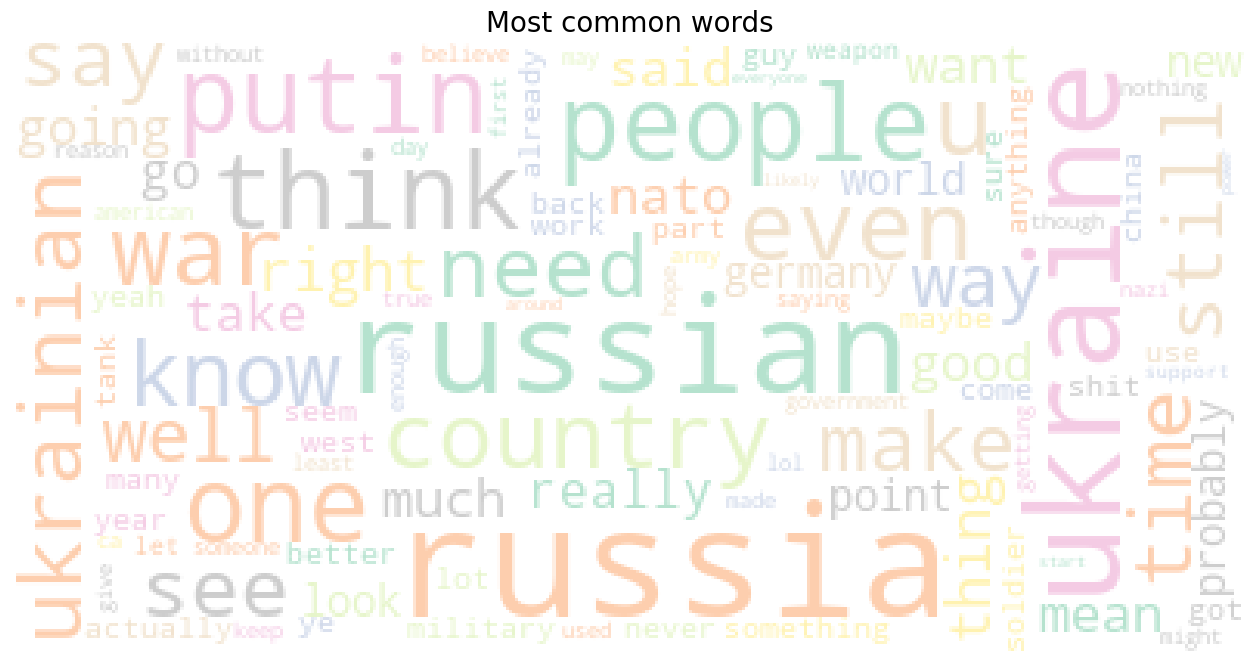

In [ ]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

word_cloud = " ".join(red_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

We can clearly see some of the expected relevant terms poping up as the common words in: Ukraine, Russia, war, Putin, NATO. Moreover, it is interesting to see that our dataset also has a fair bit of mention of Germany and China. 

##### 3.2.4.1.2 - Sentiment Classification

Now, the data is ready to be sent through our trained model and perform Sentiment Classification

In [ ]:
# To use with our model, we extract and use only the features that were used for training. 
X_test_red = Vectorize(red_text_df['body'], Fitted_Vectorizer)
X_test_red = X_test_red[english_words]
# Sentiment Prediction
test_pred_red = best_model.predict(X_test_red)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [ ]:
print(test_pred_red.shape)
test_pred_red

(31386,)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# we split the data into negative comments/posts & positive comments/posts
positive_idx_red = np.where(test_pred_red==1)[0].tolist()
negative_idx_red = np.where(test_pred_red==0)[0].tolist()
positive_red = red_text_df.iloc[positive_idx_red,:]
negative_red = red_text_df.iloc[negative_idx_red,:]

Text(0.5, 1.0, 'Number of Positive and Negative Comments')

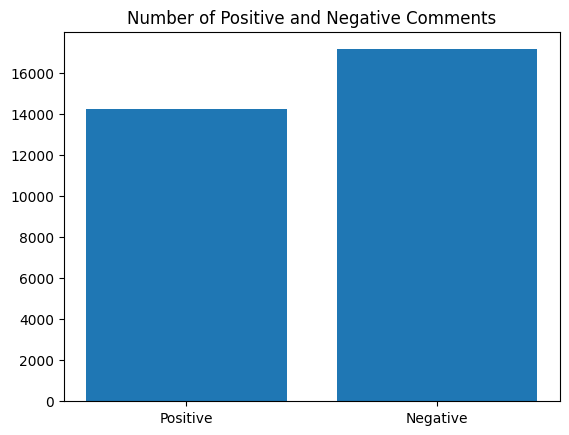

In [ ]:
plt.bar(x=('Positive', 'Negative'), height=(positive_red.shape[0], negative_red.shape[0]))
plt.title('Number of Positive and Negative Comments')

We see that we have a very good distribution of positive vs negative comments/posts from reddit. With negative comment freauency edging by just a little. 

Further, analysis and insights on this data will be seen in Part 3 and 4. 

#### 3.2.4.2 - Twitter Data

##### 3.2.4.2.1 - Import

We begin by first reading the twitter data collected and cleaning it. 

In [ ]:
# Read Twitter data scrapped using SNScrape
twitter_data = 'Raw_Tweet_Data.csv'
twitter_df = pd.read_csv(twitter_data)
twitter_df.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_2736\2570819868.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_df = pd.read_csv(twitter_data)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,0
0,https://twitter.com/NatasaJevtovic/status/1498...,2022-02-27 23:59:43+00:00,Ex-Nato head says #Putin wanted to join allian...,Ex-Nato head says #Putin wanted to join allian...,1498085470374445056,"{'username': 'NatasaJevtovic', 'id': 489482046...",0,0,0,0,...,NaN,"[{'username': 'irismarketiq', 'id': 1471155981...",NaN,NaN,"['Putin', 'Nato', 'RussiaUkraine', 'RussiaUkra...",NaN,{'title': 'Ex-Nato head says Putin wanted to j...,NaN,NaN,NatasaJevtovic
1,https://twitter.com/TheRoostergod/status/14980...,2022-02-27 23:59:38+00:00,I recommend reading about the first &amp; seco...,I recommend reading about the first &amp; seco...,1498085448392007686,"{'username': 'TheRoostergod', 'id': 4050704716...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheRoostergod
2,https://twitter.com/34istanbul571/status/14980...,2022-02-27 23:59:34+00:00,Russia-Ukraine tensions: Latest updates from o...,Russia-Ukraine tensions: Latest updates from o...,1498085431770034176,"{'username': '34istanbul571', 'id': 1451340639...",0,0,0,0,...,NaN,"[{'username': 'YouTube', 'id': 10228272, 'disp...",NaN,NaN,NaN,NaN,{'title': 'Russia-Ukraine tensions: Latest upd...,NaN,NaN,34istanbul571
3,https://twitter.com/yesliaaaa/status/149808541...,2022-02-27 23:59:30+00:00,"Omg, im so sad for him. Happy birthday handsom...","Omg, im so sad for him. Happy birthday handsom...",1498085415055593479,"{'username': 'yesliaaaa', 'id': 494917055, 'di...",0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesliaaaa
4,https://twitter.com/Pagetamil/status/149808540...,2022-02-27 23:59:27+00:00,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,1498085402594484228,"{'username': 'Pagetamil', 'id': 2503036010, 'd...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagetamil


Since, for twitter data we scrapped data only based on the dates we were interested in, we do not further need any more date-based filteration of the dataset. 

In [ ]:
# A workable copy of just the text information 
twi_text_df = twitter_df[['renderedContent']].copy(deep=True)
twi_text_df.rename(columns={'renderedContent':'Body'}, inplace=True)

In [ ]:
twi_text_df.head()

,Body
0,Ex-Nato head says #Putin wanted to join allian...
1,I recommend reading about the first &amp; seco...
2,Russia-Ukraine tensions: Latest updates from o...
3,"Omg, im so sad for him. Happy birthday handsom..."
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...


We will now get rid of the nulls in the dataset in case there were any issues while scrapping

In [ ]:
# Check nulls
twi_text_df.isnull().sum(axis=0)

Body    0
dtype: int64

We will also get rid of duplicate tweets

In [ ]:
# Drop Duplicates
print(twi_text_df.info())
twi_text_df.drop_duplicates(subset='Body', inplace=True)
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40008 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    40008 non-null  object
dtypes: object(1)
memory usage: 312.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38180 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    38180 non-null  object
dtypes: object(1)
memory usage: 596.6+ KB


Since, our model only works with english data, we will further filter the dataset to only keep the english language tweets. 

In [ ]:
# Get language of each tweet

twi_text_df['language'] = twi_text_df['Body'].apply(detect_language)
twi_text_df.head()

,Body,language
0,Ex-Nato head says #Putin wanted to join allian...,en
1,I recommend reading about the first &amp; seco...,en
2,Russia-Ukraine tensions: Latest updates from o...,en
3,"Omg, im so sad for him. Happy birthday handsom...",en
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,ta


In [ ]:
## Filter the dataset to only keep english tweets
twi_text_df = twi_text_df[twi_text_df['language'] == 'en']
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32772 entries, 0 to 40006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      32772 non-null  object
 1   language  32772 non-null  object
dtypes: object(2)
memory usage: 768.1+ KB


Now, similar to our training data that we used, we will pre-process this new data collected

In [ ]:
twi_text_df['pre-processed'] = twi_text_df['Body'].map(PreProcessor)
twi_text_df['pre-processed text'] = twi_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


For a quick exploratory step, we will now check the word cloud of the collected data

(-0.5, 399.5, 199.5, -0.5)

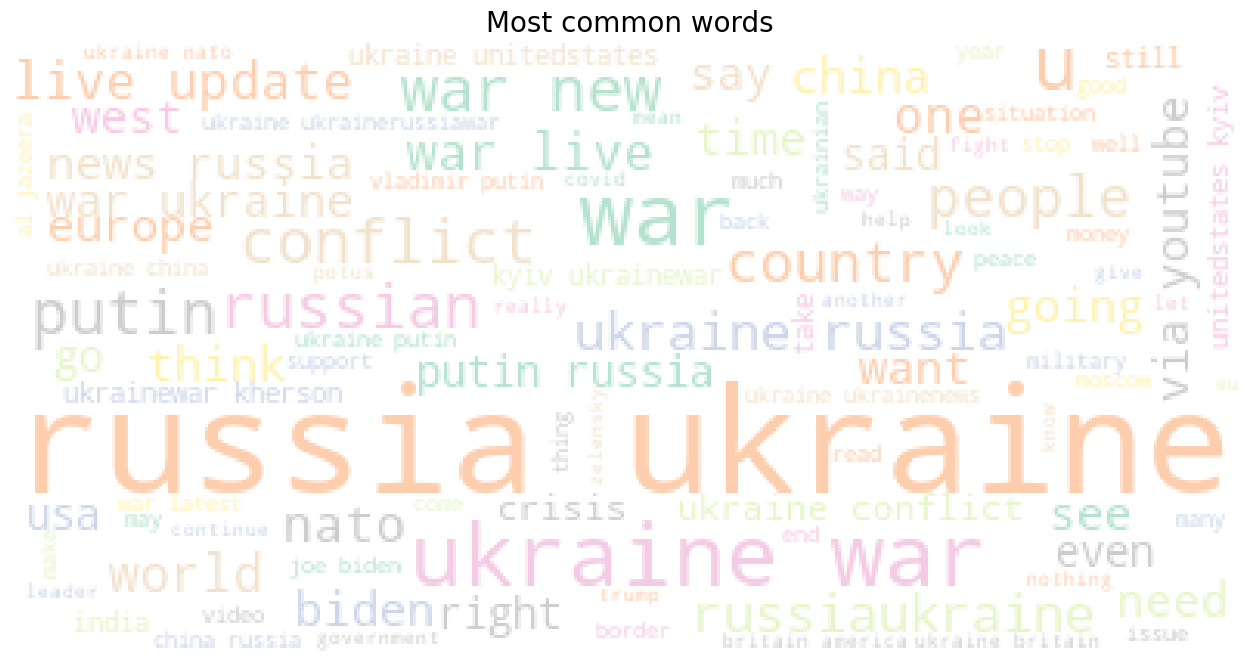

In [ ]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

word_cloud = " ".join(twi_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

We see some similar results like in Reddit data. The notable differences are the increased mention of the term "conflict" and mention of China, USA and President Biden.

##### 3.2.4.2.2 - Sentiment Classification

Now we begin the sentiment classification on twitter data

In [ ]:
# To use with our model, we extract and use only the features that were used for training. 
X_test_twi = Vectorize(twi_text_df['Body'], Fitted_Vectorizer)
X_test_twi = X_test_twi[english_words]
# Sentiment Prediction
test_pred_twi = best_model.predict(X_test_twi)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
test_pred_twi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
## We split the data into Positive and Negative and transform them into formats that could be useful later. 
positive_idx_twi = np.where(test_pred_twi==1)[0].tolist()
negative_idx_twi = np.where(test_pred_twi==0)[0].tolist()

positive_twi = twi_text_df.iloc[positive_idx_twi,:]
negative_twi = twi_text_df.iloc[negative_idx_twi,:]

positive_words_twi = positive_twi['pre-processed'].tolist()
negative_words_twi = negative_twi['pre-processed'].tolist()

Text(0.5, 1.0, 'Number of Positive and Negative Tweets')

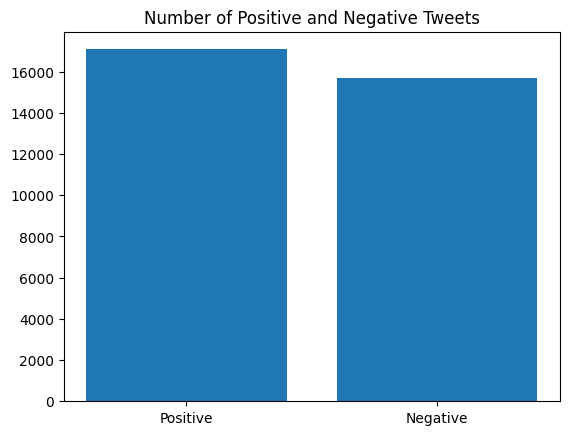

In [ ]:
plt.bar(x=('Positive', 'Negative'), height=(positive_twi.shape[0], negative_twi.shape[0]))
plt.title('Number of Positive and Negative Tweets')

In a good complement to the reddit data we have,the twitter data also shares a similar distribution between the two with Positive edging out by just a little. 

Further, Analysis and Insights will be seen in Part 3 and Part 4

#### 3.2.4.3 - News Data

##### 3.2.4.3.1 - Import

We begin by reading, cleaning the News article data

In [ ]:
# Read news article data
news_data = 'russia_ukraine_rss_data.csv'
news_df = pd.read_csv(news_data)
news_df.head()

,title,title_detail,links,link,comments,published,published_parsed,authors,author,author_detail,...,foaf_homepage,rights,rights_detail,href,gd_image,media_thumbnail,thr_total,media_content,media_credit,credit
0,"As NATO Gains New Strength, Moscow Resorts to ...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/as-nato-gains-n...,https://blogs.prio.org/2023/03/as-nato-gains-n...,"Tue, 28 Mar 2023 09:21:54 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Four Complications for the Rushed Putin-Xi Summit,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/four-complicati...,https://blogs.prio.org/2023/03/four-complicati...,"Tue, 21 Mar 2023 08:30:55 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taiwan Is Feeling the Pressure from Russian an...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/taiwan-is-feeli...,https://blogs.prio.org/2023/03/taiwan-is-feeli...,"Mon, 20 Mar 2023 12:39:59 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Adjusts Limits on Partnership With Russia,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/china-adjusts-l...,https://blogs.prio.org/2023/03/china-adjusts-l...,"Tue, 14 Mar 2023 13:48:34 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russia-Ukraine War Compels Japan to Reassess C...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/russia-ukraine-...,https://blogs.prio.org/2023/03/russia-ukraine-...,"Mon, 06 Mar 2023 14:33:02 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
news_df.shape

(476, 33)

News article have a lot more text in them to use for sentiment analysis. Hence although fewer articles are scrapped as compared to the twitter or reddit data, we still have comparable amount of textual data to perform sentiment analysis. Further, since RSS does not allow historic information to be retrieved, we will conduct our sentiment analysis on the latest published articles. 

In [ ]:
# A workable copy of just the text information 
news_text_df = news_df[['text']].copy(deep=True)
news_text_df.rename(columns={'text':'Body'}, inplace=True)
news_text_df.head()

,Body
0,"On March 23, the historic process of North Atl..."
1,Chinese President Xi Jinping’s state visit to ...
2,Taiwan is where Russia’s war in Ukraine and Ch...
3,The Russian army’s ongoing struggle to capture...
4,Against the backdrop of the grisly Russia-Ukra...


Remove null values

In [ ]:
news_text_df.isnull().sum(axis=0)
news_text_df.dropna(inplace=True)

Remove Duplicates

In [ ]:
# Drop Duplicates, keeping the first occurence, as the default value of keep attribute is 'first'
print(news_text_df.info())
news_text_df.drop_duplicates(subset='Body', inplace=True)
news_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 475
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    441 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 475
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    282 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


Again, we will filter out non-english articles

In [ ]:
## Get language of each article
news_text_df['language'] = news_text_df['Body'].apply(detect_language)
news_text_df.head()

,Body,language
0,"On March 23, the historic process of North Atl...",en
1,Chinese President Xi Jinping’s state visit to ...,en
2,Taiwan is where Russia’s war in Ukraine and Ch...,en
3,The Russian army’s ongoing struggle to capture...,en
4,Against the backdrop of the grisly Russia-Ukra...,en


In [ ]:
## Filtering based on language
news_text_df = news_text_df[news_text_df['language'] == 'en']
news_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      282 non-null    object
 1   language  282 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


Now, similar to our training data that was used, we will pre-process this new data collected. 

In [ ]:
news_text_df['pre-processed'] = news_text_df['Body'].map(PreProcessor)
news_text_df['pre-processed text'] = news_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

For a quick exploratory step, we will now check the word cloud of the collected data

(-0.5, 399.5, 199.5, -0.5)

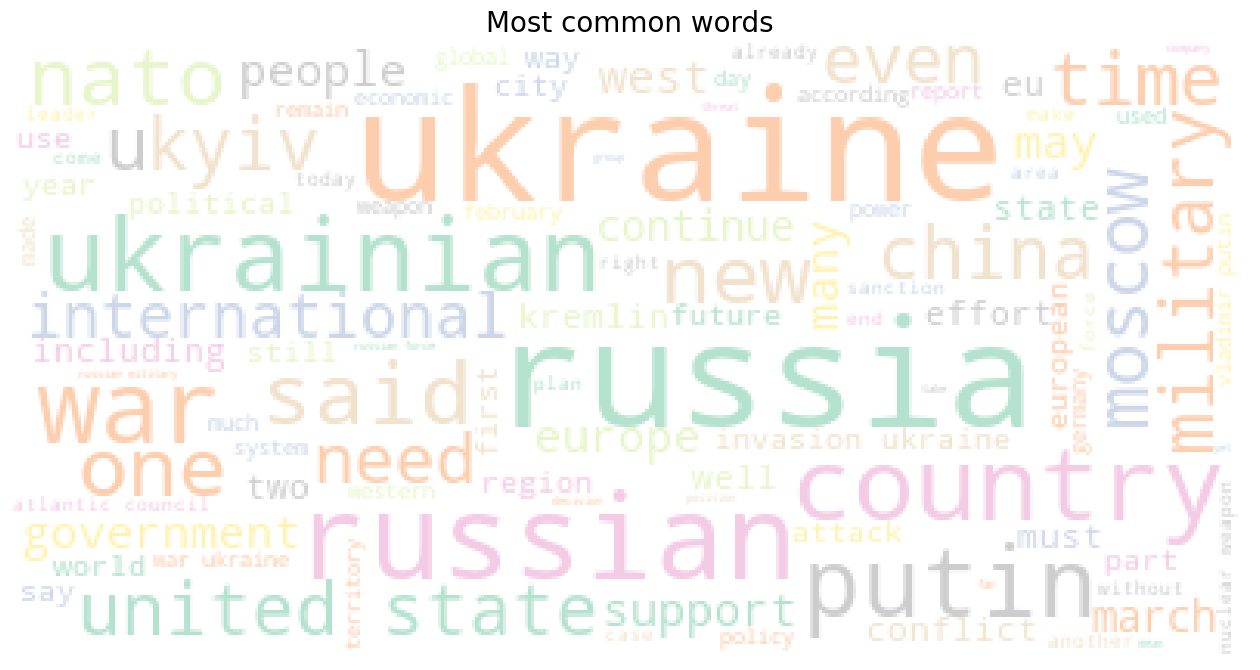

In [ ]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

word_cloud = " ".join(news_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

We see that the mention of Moscow, Kyiv, international is more frequent in news articles than in the tweets or reddit posts. 

##### 3.2.4.3.2 - Sentiment Classification

Now, the data is ready to be sent through our trained model and perform Sentiment Classification

In [ ]:
# To use with our model, we extract and use only the features that were used for training. 
X_test_news = Vectorize(news_text_df['Body'], Fitted_Vectorizer)
X_test_news = X_test_news[english_words]
# Sentiment Prediction
test_pred_news = best_model.predict(X_test_news)  

In [ ]:
test_pred_news

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [ ]:
# we split the data into negative & positive articles

positive_idx_news = np.where(test_pred_news==1)[0].tolist()
negative_idx_news = np.where(test_pred_news==0)[0].tolist()

positive_news = news_text_df.iloc[positive_idx_news,:]
negative_news = news_text_df.iloc[negative_idx_news,:]

positive_words_news = positive_news['pre-processed'].tolist()
negative_words_news = negative_news['pre-processed'].tolist()

Text(0.5, 1.0, 'Number of Positive and Negative Articles')

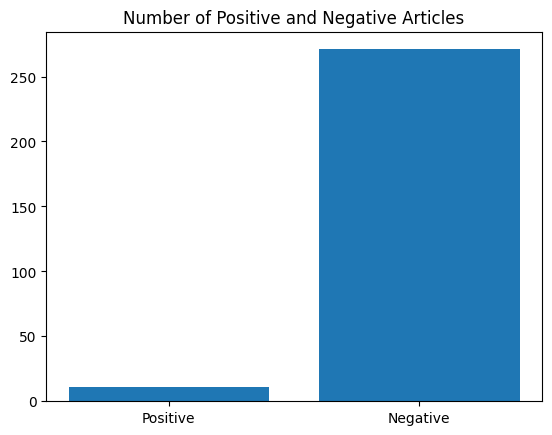

In [ ]:
plt.bar(x=('Positive', 'Negative'), height=(positive_news.shape[0], negative_news.shape[0]))
plt.title('Number of Positive and Negative Articles')

A clear observation is that our model has predicted that there are almost 25 times more negative articles than positive. Now, given the topic of our analysis (a War) this result could sincerely represent the overall journalists' opinion, that is most if not all, feel negative emotions when discussing a war.

Further Insights and conclusions will be made in Part 3 and Part 4

# 4 - Topic Modeling / Identification

To understand what actually drives a negative or positive sentiment, we must now perform an NLP method for Topic Modeling or Topic Identification. This Method will provide us with possible topics that are being discussed in any body of text. We will run our positive and negative data seperately through these for each source to identify the topics that cause a sentiment. \
\
We experimented with three different approaches using the twitter data (as it was very similar to training data) to get topics: Latent Dirichlet Allocation (LDA) using the gensim library, Latent Dirichlet Allocation (LDA) using the sklearn library, and Latent Semantic Analysis method. \

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used in topic modelling for discrete datasets such as text corpora. It is a three-level hierarchical Bayesian model, such that each text, i.e., Reddit post / Tweet / Article, is represented as a finite mixture over an underlying set of topics, and each topic is represented by an infinite collections of topic probabilities. After numbers of iterations, LDA outputs the composition of topics which best describes the given collection of texts. Hence, as the number of topics need not be pre-defined, via testing we found the combination that gives the most meaningful result is 10 topics with 15 words inside each topic. \

Latent sentiment analysis (LSA) is an alternative topic modelling method that instead of using probabilistic model, uses a linear algebra method called singular value decomposition (SVD). SVD allows LSA to combine/lower dimensions while preserving the similarity structure. The features in combined matrix will be the topics selected. For consistency, the number of topics found by LSA is also set to 10. Topics generated by LSA are more repetitive than those generated by LDA. We speculate this is because LSA treats documents separately while LDA treats documents as a whole, and LSA emphasizes on dimension reduction which loses statistical information. Hence, LDA is the algorithm chosen for topic modeling. 

LDA FROM GENSIM VS. SCIKIT-LEARN LIBRARY \

 We have compared LDA models from Python library Gensim to Scikit-Learn. Both models take the labeled data, and the output is the topics. Topics are methodologically hard to compare since models use different assortments of words for each iteration. Also, there is no definitive score to compare between the two models. Therefore, two models are evaluated based on human judgement of the interpretability to their generated topics. We noticed that LDA from Scikit-Learn library did better at convergence and produces topics with greater diversity in terms of the variation of words across topics. The topics generated by Scikit-Learn LDA also are more meaningful in natural language. Thus, for further analysis, we will mainly focus on interpreting topics generated by Scikit-Learn LDA, with Gensim LDA as supporting source. 



## 4.1 - Reddit Data 

### 4.1.1 - Method: LDA - sklearn library

Let's look at positive data first: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')

# Transform the data into a format usable by the sklearn library
vect_p_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_red =vect_p_red.fit_transform(positive_red['pre-processed text'])

In [ ]:
# Implement the LDA model 
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p2_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p2_red=lda_model_p2_red.fit_transform(vect_text_p_red)

In [ ]:
# See the results
vocab = vect_p_red.get_feature_names_out()
print('REDDIT DATA: Topics from Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p2_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')


REDDIT DATA: Topics from Positive Comments - Method 2
Topic 0: 
russia weapon mean fuck bad china sure make want read yeah nuke nuclear never would 

Topic 1: 
get hope send way army oh love ukrainian better russian hopefully kind saw happy special 

Topic 2: 
time shit news one nice source talking man problem big put video sorry fact done 

Topic 3: 
like back even great look everyone point nothing fucking take power always ever another someone 

Topic 4: 
yes well need getting maybe say stupid much work germany na going soon month nato 

Topic 5: 
russian putin war call world best year yet russia also system idea start europe ground 

Topic 6: 
good thanks tank thank new see long know used interesting true watch hard one time 

Topic 7: 
got exactly let must line wonder ukraine real himars lost change move crimea missile general 

Topic 8: 
think go guy russian russia country like seems lot probably military come ukraine help hell 

Topic 9: 
lol would day also keep agree wrong wait 

Now, the negative data

In [ ]:
vect_n_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_red =vect_n_red.fit_transform(negative_red['pre-processed text'])

In [ ]:
lda_model_n_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_red=lda_model_n_red.fit_transform(vect_text_n_red)

In [ ]:
vocab = vect_n_red.get_feature_names_out()
print('REDDIT DATA: Topics from Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')

REDDIT DATA: Topics from Negative Comments - Method 2
Topic 0: 
right thought eu thats oil fuck money thinking nice first gas pay wing thing price 

Topic 1: 
war russia ukraine putin russian leader force turkey mobilization military end would nato ukrainian serious 

Topic 2: 
like tank one would line russian missile russia front system least point air sound vehicle 

Topic 3: 
love really na gon guy wait something ammo death knew work joke ok would burn 

Topic 4: 
russia ukraine would russian china mean think move back going country crimea million time money 

Topic 5: 
please bot link concern action moderator question automatically nitter kherson russian like post account comment 

Topic 6: 
lol contact performed good hate funny fuel running car lack sense fucking trump pretty make 

Topic 7: 
hear mostly old asshole name interesting men already woman try supposed higher nuke join ever 

Topic 8: 
russia russian people would ukraine war nuclear putin like one country think even kno

## 4.2 - Twitter Data

### 4.2.1 - Method 1: LDA - gensim library

LDA resource: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 

In [ ]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p_twi = corpora.Dictionary(positive_words_twi)
# Create Corpus
texts_p_twi = positive_words_twi
# Term Document Frequency
corpus_p_twi = [id2word_p_twi.doc2bow(text) for text in texts_p_twi]

# Create Dictionary
id2word_n_twi = corpora.Dictionary(negative_words_twi)
# Create Corpus
texts_n_twi = negative_words_twi
# Term Document Frequency
corpus_n_twi = [id2word_n_twi.doc2bow(text) for text in texts_n_twi]

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Lets, see the positive topics first

In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p_twi = gensim.models.LdaMulticore(corpus=corpus_p_twi,
                                       id2word=id2word_p_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Positive Comments - method 1')
pprint(lda_model_p_twi.print_topics())
doc_lda_p_twi = lda_model_p_twi[corpus_p_twi]

Twitter Data: Positive Comments - method 1
[(0,
  '0.079*"ukraine" + 0.074*"russia" + 0.032*"war" + 0.020*"putin" + '
  '0.011*"news" + 0.010*"kherson" + 0.007*"china" + 0.007*"biden" + '
  '0.006*"nato" + 0.005*"russian"'),
 (1,
  '0.081*"ukraine" + 0.076*"russia" + 0.027*"war" + 0.017*"russian" + '
  '0.014*"putin" + 0.009*"news" + 0.009*"ukrainian" + 0.008*"ukrainewar" + '
  '0.006*"nato" + 0.006*"u"'),
 (2,
  '0.047*"war" + 0.046*"ukraine" + 0.042*"russia" + 0.014*"putin" + '
  '0.011*"conflict" + 0.010*"russian" + 0.009*"via" + 0.006*"news" + '
  '0.006*"kherson" + 0.006*"youtube"'),
 (3,
  '0.029*"ukraine" + 0.024*"russia" + 0.021*"war" + 0.013*"russiaukraine" + '
  '0.011*"russian" + 0.009*"conflict" + 0.007*"u" + 0.005*"news" + '
  '0.004*"putin" + 0.004*"world"'),
 (4,
  '0.035*"russia" + 0.029*"ukraine" + 0.020*"war" + 0.008*"putin" + '
  '0.007*"conflict" + 0.007*"china" + 0.006*"u" + 0.005*"peace" + '
  '0.005*"biden" + 0.005*"india"'),
 (5,
  '0.039*"ukraine" + 0.037*"russ

Now, the negative topics

In [ ]:
lda_model_n_twi = gensim.models.LdaMulticore(corpus=corpus_n_twi,
                                       id2word=id2word_n_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Negative Comments - method 1')
pprint(lda_model_n_twi.print_topics())
doc_lda_n_twi = lda_model_n_twi[corpus_n_twi]

Twitter Data: Negative Comments - method 1
[(0,
  '0.056*"ukraine" + 0.053*"russia" + 0.020*"war" + 0.013*"russian" + '
  '0.008*"ukrainian" + 0.007*"nato" + 0.005*"one" + 0.005*"putin" + '
  '0.005*"people" + 0.005*"biden"'),
 (1,
  '0.030*"war" + 0.021*"ukraine" + 0.019*"russia" + 0.007*"world" + '
  '0.006*"biden" + 0.006*"putin" + 0.006*"u" + 0.005*"crisis" + '
  '0.005*"russian" + 0.004*"live"'),
 (2,
  '0.034*"russia" + 0.033*"ukraine" + 0.029*"war" + 0.014*"putin" + '
  '0.013*"russian" + 0.008*"u" + 0.006*"people" + 0.006*"biden" + '
  '0.006*"would" + 0.006*"think"'),
 (3,
  '0.029*"russia" + 0.023*"ukraine" + 0.019*"war" + 0.013*"russian" + '
  '0.008*"ukrainian" + 0.008*"china" + 0.008*"biden" + 0.007*"u" + '
  '0.007*"kherson" + 0.006*"russiaukraine"'),
 (4,
  '0.033*"war" + 0.030*"ukraine" + 0.024*"russia" + 0.008*"u" + '
  '0.006*"country" + 0.006*"putin" + 0.006*"russian" + 0.005*"going" + '
  '0.005*"people" + 0.004*"live"'),
 (5,
  '0.040*"ukraine" + 0.040*"russia" + 0

### 4.2.2 - Method 2: LDA - sklearn library

LDA #2 Resource: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

We will first find topics that represent Positive Sentiment

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_twi =vect_p_twi.fit_transform(positive_twi['pre-processed text'])
# vect_text_p2 =vect2.fit_transform(positive['Body'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p_twi=lda_model_p_twi.fit_transform(vect_text_p_twi)

In [ ]:
vocab2 = vect_p_twi.get_feature_names_out()
print('Twitter Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


Twitter Data: Positive Comments - Method 2
Topic 0: 
surprise speech poland putin conflict president zelenskyy war russia ukraine watch vladimir read say started 

Topic 1: 
china war ukraine could russia blame covid time battle report next chief go ally side 

Topic 2: 
ukraine russia russian anniversary russiaukrainewar ukrainewar ukrainenews war ukrainerussiawar russiaukraine ukrainian wagner military putin ukrainerussianwar 

Topic 3: 
peace ccp europe situation putin ukraine 中国 market 二十大 difficult china 普京 习近平 疫情 russia 

Topic 4: 
list unitedstates address news thank help share mark top keep three annexed group war understand 

Topic 5: 
britain ukraine russia war arm germany usa visit nuclear world expert biden stopped global putin 

Topic 6: 
kherson ukraine russia kyiv war look year china arrives impact like one ukrainewar medium comment 

Topic 7: 
america war ukraine russia china talk state gas news ahead al jazeera nation pipeline india 

Topic 8: 
day zelensky ukraine war

Now we find topics that represent Negative Sentiment

In [ ]:
vect_n_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_twi =vect_n_twi.fit_transform(negative_twi['pre-processed text'])

In [ ]:
lda_model_n_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_twi=lda_model_n_twi.fit_transform(vect_text_n_twi)

In [ ]:
vocab2 = vect_n_twi.get_feature_names_out()
print('Twitter Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

Twitter Data: Negative Comments - Method 2
Topic 0: 
know day invasion war glance security biden potus ukraine address democracy expert expected joe invaded 

Topic 1: 
visit bakhmut soldier house wounded white interest ukraine fighting wagner air front fighter battlefield coverage 

Topic 2: 
ukraine russia defence congress fight dollar started head war rogozin must caused crime reported laundering 

Topic 3: 
russia ukraine war energy poland price also gas inflation global crisis turkey economy country oil 

Topic 4: 
biden ukraine russia war putin live nato unitedstates germany president border zelensky update crimea news 

Topic 5: 
kherson ukraine russian russia ukrainewar kyiv ukrainian force war troop news drone footage iran attack 

Topic 6: 
america ukraine russia war china britain biden money people trump american would think conflict first 

Topic 7: 
war ukraine russia politics news ukrainenews stand putin breakingnews shelling al research month jazeera life 

Topic 8: 
rus

### 4.2.3 - Method 3: LSA 

Source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/ 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_p_twi = vectorizer3.fit_transform(positive_twi['pre-processed text'])
vectorizer4 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_n_twi = vectorizer4.fit_transform(negative_twi['pre-processed text'])

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model_p_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_p_twi.fit(Out_p_twi)

svd_model_n_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_n_twi.fit(Out_n_twi)


TruncatedSVD(n_components=10, n_iter=100, random_state=122)

Positve topics: 

In [ ]:
terms_p_twi = vectorizer3.get_feature_names_out()
print('Twitter Data Method 3: LSA - Positive Comments')
for i, comp in enumerate(svd_model_p_twi.components_):
    terms_comp = zip(terms_p_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Positive Comments
Topic 0: 
war news putin live update russian kherson 

Topic 1: 
putin russian ukrainewar kherson russiaukraine ukrainian kyiv 

Topic 2: 
kherson russian ukrainewar ukrainian news unitedstates ukrainenews 

Topic 3: 
update live news kherson latest york new 

Topic 4: 
day list key event news putin conflict 

Topic 5: 
conflict china update live russiaukraine india youtube 

Topic 6: 
russiaukraine update live ukrainerussiawar day russian list 

Topic 7: 
news russiaukraine ukrainenews russian remain conflict al 

Topic 8: 
biden china russiaukraine news america president joe 

Topic 9: 
russiaukraine kherson kyiv unitedstates conflict war putin 



Negative Topics: 

In [ ]:
terms_n_twi = vectorizer4.get_feature_names_out()
print('Twitter Data Method 3: LSA - Negative Comments')
for i, comp in enumerate(svd_model_n_twi.components_):
    terms_comp = zip(terms_n_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Negative Comments
Topic 0: 
war putin russian news know ukrainian kherson 

Topic 1: 
know day invasion war glance latest guardian 

Topic 2: 
day kherson know invasion russian ukrainian glance 

Topic 3: 
putin know invasion day russian nuclear russiaukraine 

Topic 4: 
putin live news war update nuclear say 

Topic 5: 
china biden live update kyiv conflict kherson 

Topic 6: 
kherson putin unitedstates ukrainewar kyiv war america 

Topic 7: 
conflict kherson nato kyiv live nuclear unitedstates 

Topic 8: 
nato live update country kyiv say missile 

Topic 9: 
news nato china nuclear force ukrainenews threat 



## 4.3 - News Data

### 4.3.1 - Method: LDA - sklearn

Positive Topics from articles: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')

vect_p_news =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_news =vect_p_news.fit_transform(positive_news['pre-processed text'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p_news=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p_news=lda_model_p_news.fit_transform(vect_text_p_news)

In [ ]:
vocab3 = vect_p_news.get_feature_names_out()
print('News Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p_news.components_):
     vocab_comp2 = zip(vocab3, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


News Data: Positive Comments - Method 2
Topic 0: 
deal recent last van came demand plan gun western guardian drifting figure information men precedent 

Topic 1: 
messaging next role cost formed emphatic leader consists ravaged thanks number law institute communication billion 

Topic 2: 
pivden ready privacy crucial oblast flat war one expose drone prosecute aid hope supported along 

Topic 3: 
aid three recent substantial thursday rooted expressed new might majority infrastructure oppose say monday uncontrollably 

Topic 4: 
urgently illegally thanks moscow challenge management coastal hear gun become presidency sight flat schaack destruction 

Topic 5: 
date beyond international van achieve since dmitry crucial experience detail good doctrine destroy lead substantial 

Topic 6: 
position expose martial auspex shield thing outfit kharkiv even element destruction deal approach army proposal 

Topic 7: 
counteroffensive doctrine visiting haul strike command national code presidency ful

Negative Topics from Articles: 

In [ ]:
vect_n_news =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_news =vect_n_news.fit_transform(negative_news['pre-processed text'])

In [ ]:
lda_model_n_news=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_news=lda_model_n_news.fit_transform(vect_text_n_news)

In [ ]:
vocab3 = vect_n_news.get_feature_names_out()
print('News Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_news.components_):
     vocab_comp2 = zip(vocab3, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

News Data: Negative Comments - Method 2
Topic 0: 
ukraine russian ukrainian russia nuclear oblast force village border frontline detail journalist bakhmut war guard 

Topic 1: 
ukraine russian taiwan russia ukrainian partnership united procurement military syria poland incident issued ukrainealert past 

Topic 2: 
crimea russian ukraine russia government air began information victory situation resistance ukrainian significant protection right 

Topic 3: 
russia ukraine russian ukrainian putin oil child imperial energy state strike account center price political 

Topic 4: 
eu ukraine china putin european russia europe war world country biden state xi law global 

Topic 5: 
russia russian ukraine china nuclear war gmt said putin nato beijing moscow would xi chinese 

Topic 6: 
ukraine russian ukrainian russia military local year defense also war child spending information woman asia 

Topic 7: 
icc ukraine center russia ukrainian tribunal international council nato justice putin turkey 

# 5 - Visualizations

## 5.1 - Wordclouds

(-0.5, 399.5, 199.5, -0.5)

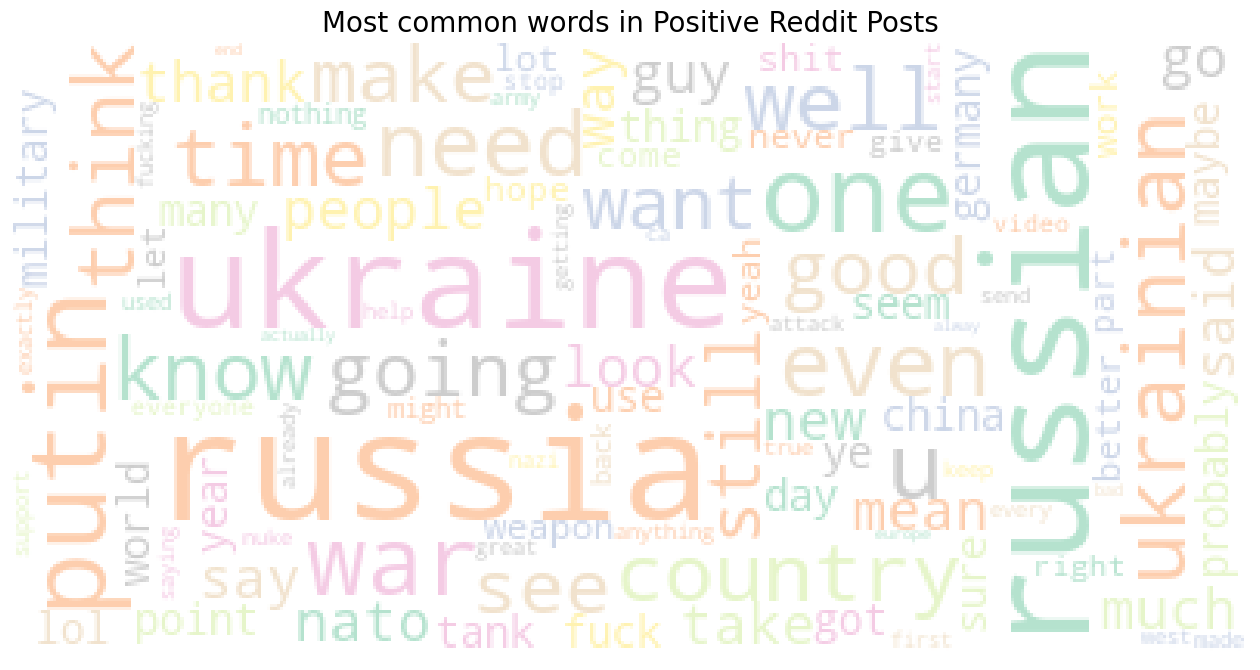

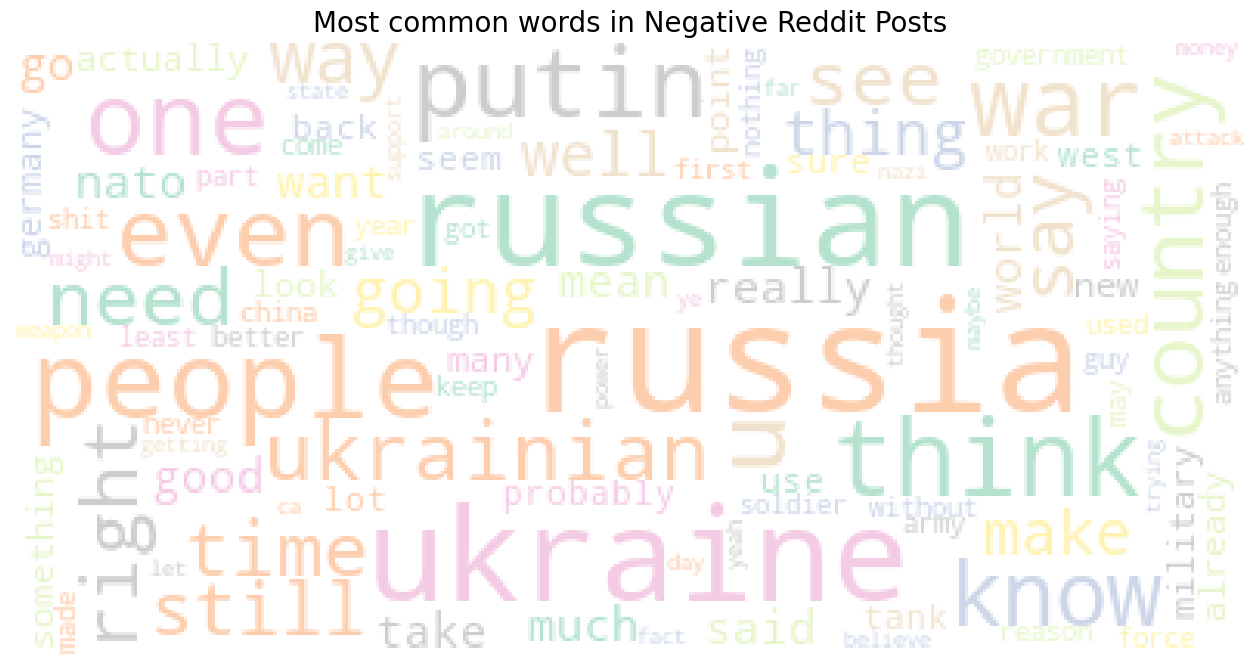

In [ ]:
# 1. Reddit - Kaggle Data - Positive: 
word_cloud = " ".join(positive_red['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive Reddit Posts", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 2. Reddit - Kaggle Data - Negative
word_cloud = " ".join(negative_red['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative Reddit Posts", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

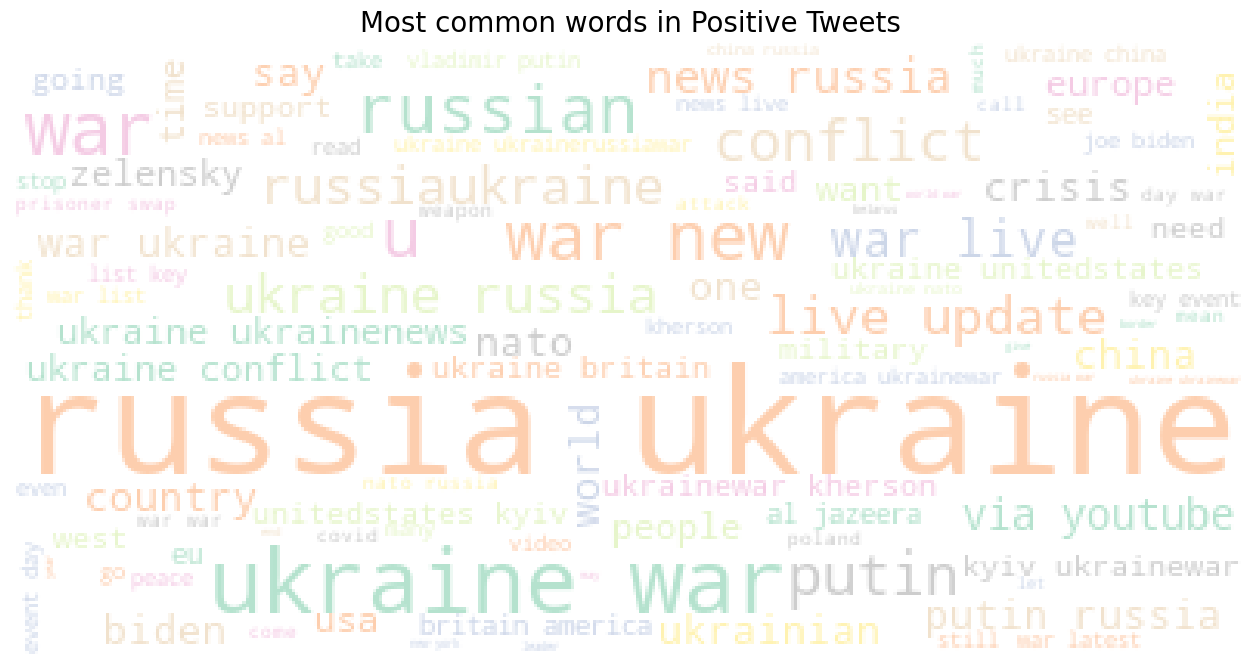

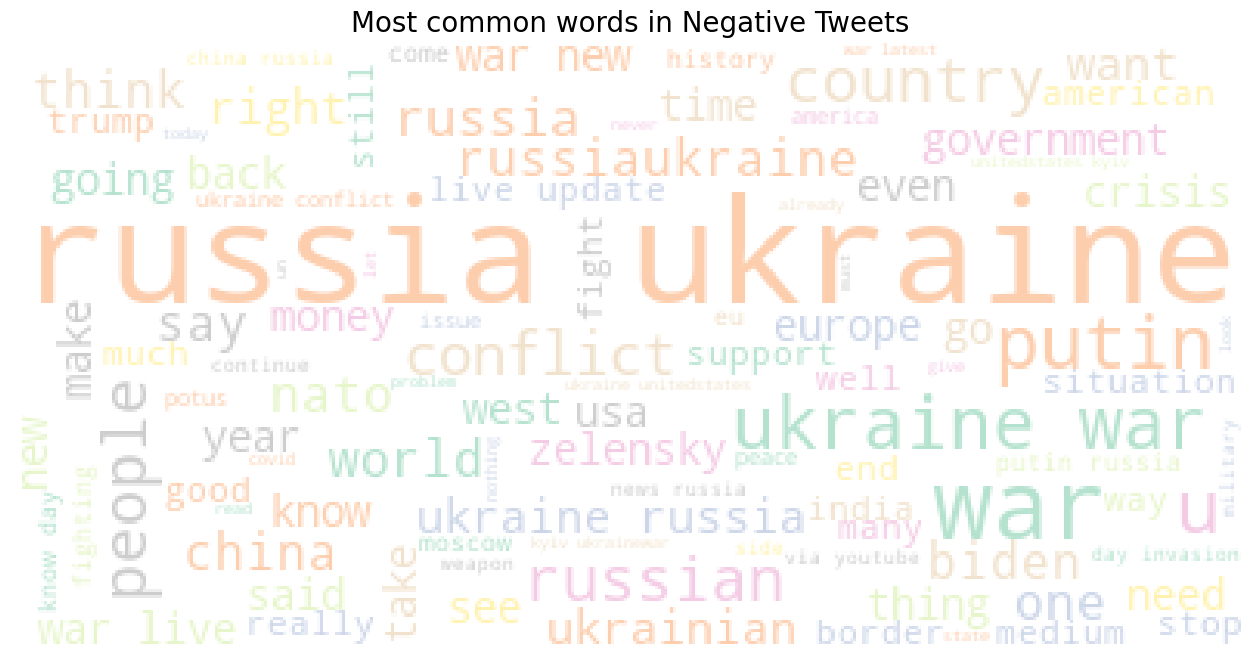

In [ ]:
# 3. Twitter Data - Positive: 
word_cloud = " ".join(positive_twi['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive Tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 4. Twitter Data - Negative
word_cloud = " ".join(negative_twi['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative Tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

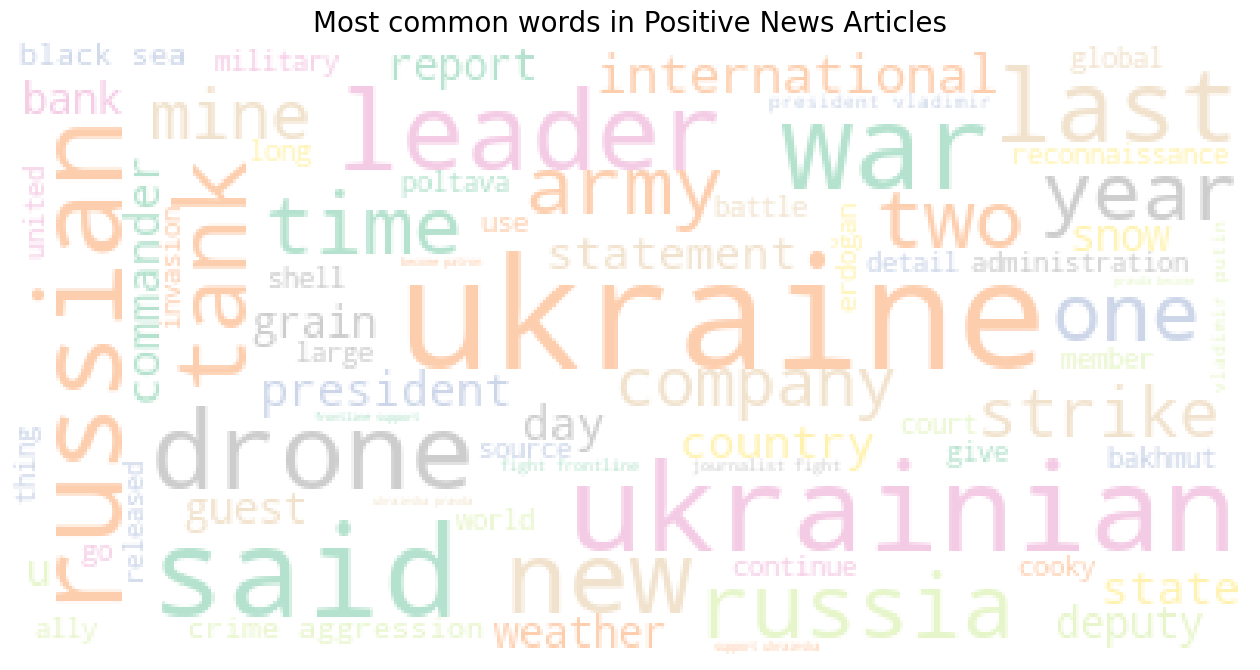

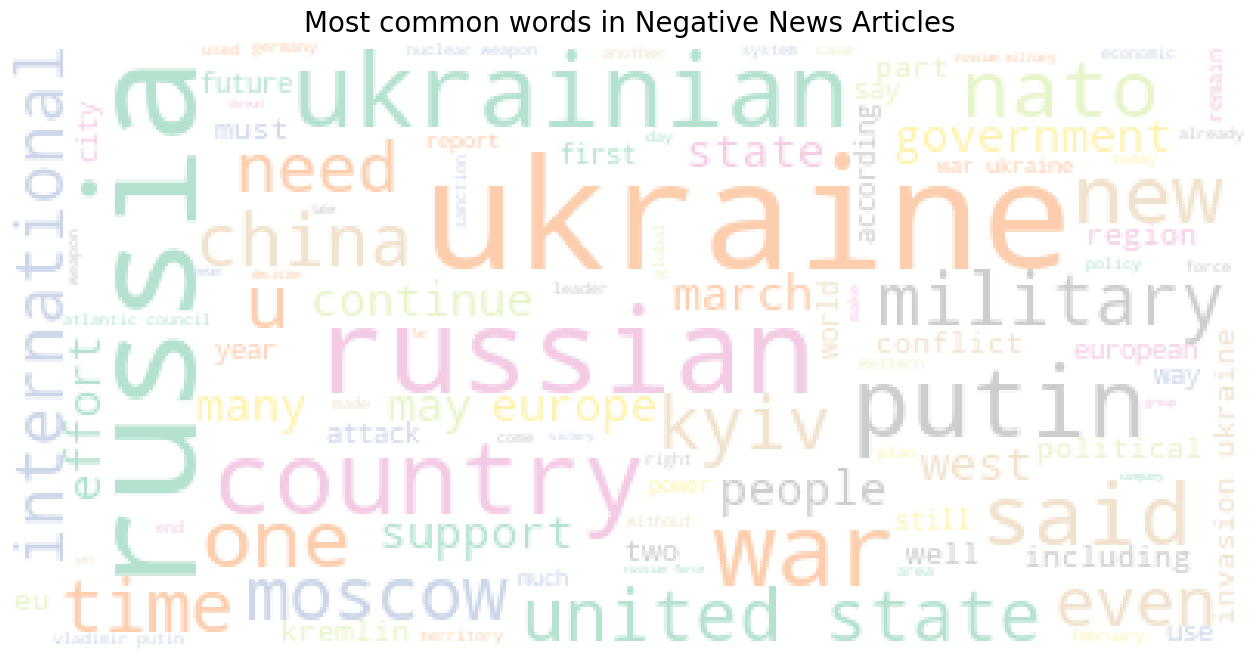

In [ ]:
# 5. News Articles Data - Positive: 
word_cloud = " ".join(positive_news['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive News Articles", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 6. News Articles Data - Negative
word_cloud = " ".join(negative_news['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative News Articles", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

## 5.2 - Sentiments over Time

### 5.2.1 - Reddit

In [ ]:
red_viz_df = reddit_df[reddit_df.index.isin(red_text_df.index)]
red_viz_df['sentiment'] = test_pred_red
red_viz_df = red_viz_df[['body', 'Date', 'sentiment']]
red_viz_df

,title,score,id,url,comms_num,created,body,timestamp,Date
13161,Comment,1,i2i2eek,NaN,0.0,1.648511e+09,well are those recon dudes in for a shock when...,2022-03-28 23:48:18,2022-03-28
13163,Comment,1,i2i2dgd,NaN,0.0,1.648511e+09,I hate that you make sense,2022-03-28 23:48:04,2022-03-28
13164,Comment,1,i2i2cnp,NaN,0.0,1.648511e+09,Russian’s just don’t understand that they are ...,2022-03-28 23:47:53,2022-03-28
13167,Comment,1,i2i2c8n,NaN,0.0,1.648511e+09,Exactly. Thank you for mentioning dedovshchina...,2022-03-28 23:47:47,2022-03-28
13170,Comment,1,i2i2bq9,NaN,0.0,1.648511e+09,So is Putin so it should be a fair matchup.,2022-03-28 23:47:40,2022-03-28
...,...,...,...,...,...,...,...,...,...
253489,Comment,5,ire9dji,NaN,0.0,1.665145e+09,I doubt the city being a major city will put a...,2022-10-07 12:11:20,2022-10-07
253490,Comment,2,ire9dhz,NaN,0.0,1.665145e+09,Except China isn’t just any country. They have...,2022-10-07 12:11:20,2022-10-07
253491,Comment,1,ire9dgw,NaN,0.0,1.665145e+09,As they weren’t shitting themselves before…,2022-10-07 12:11:19,2022-10-07
253492,Comment,18,ire9cat,NaN,0.0,1.665145e+09,"TL:\n\nIn Mariupol, which was temporarily capt...",2022-10-07 12:10:58,2022-10-07


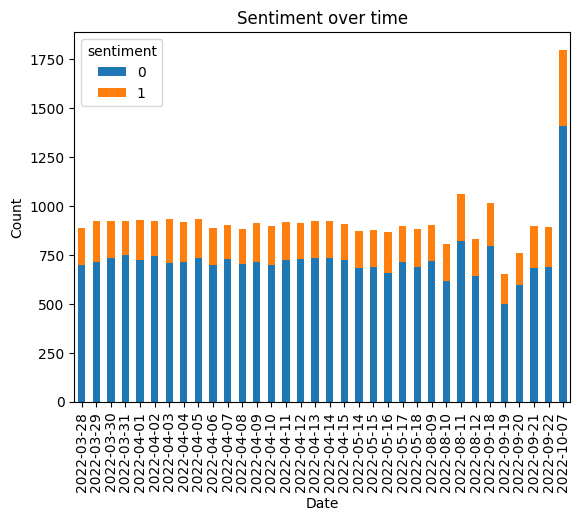

In [ ]:
# Group by date and sentiment, and count the number of occurrences
red_viz_grouped = red_viz_df.groupby(['Date', 'sentiment']).size().reset_index(name='counts')

# Pivot the dataframe to create separate columns for each sentiment
pivoted = red_viz_grouped.pivot(index='Date', columns='sentiment', values='counts').fillna(0)

# Plot a time series bar plot of the pivoted dataframe
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment over time REDDIT')
plt.show()

### 5.2.2 - Twitter

In [ ]:
twi_viz_df = twitter_df[twitter_df.index.isin(twi_text_df.index)]
twi_viz_df['sentiment'] = test_pred_twi
twi_viz_df = twi_viz_df[['renderedContent', 'date', 'sentiment']]
twi_viz_df['Date'] = twi_viz_df['date'].map(date_extract)
twi_viz_df = twi_viz_df[['renderedContent', 'Date', 'sentiment']]
twi_viz_df

<ipython-input-128-6c4f75723bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twi_viz_df['sentiment'] = test_pred_twi


,renderedContent,Date,sentiment
0,Ex-Nato head says #Putin wanted to join allian...,2022-02-27,0
1,I recommend reading about the first &amp; seco...,2022-02-27,0
2,Russia-Ukraine tensions: Latest updates from o...,2022-02-27,0
3,"Omg, im so sad for him. Happy birthday handsom...",2022-02-27,0
5,@ChessProblem I propose that he must play in t...,2022-02-27,1
...,...,...,...
40000,@CoenraadKramers @squatsons The Russian majori...,2023-02-20,0
40001,Russia – Ukraine war updates as of February 20...,2023-02-20,0
40002,"@WatchinMadness This is what ""compromised"" mea...",2023-02-20,1
40003,@StephenGrootes @SAfmRadio Are we not a Sovere...,2023-02-20,0


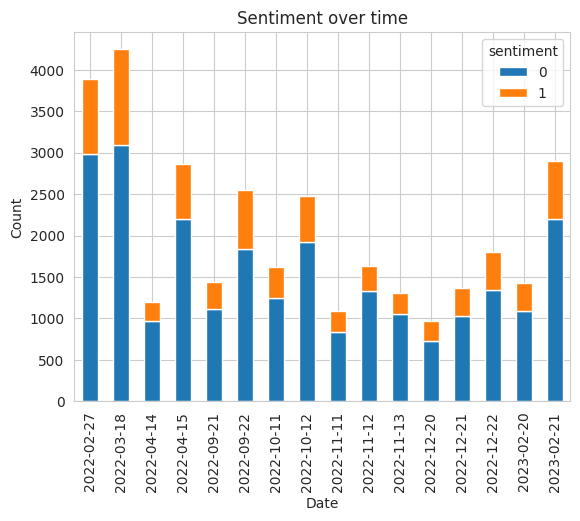

In [ ]:
# Group by date and sentiment, and count the number of occurrences
twi_viz_grouped = twi_viz_df.groupby(['Date', 'sentiment']).size().reset_index(name='counts')

# Pivot the dataframe to create separate columns for each sentiment
pivoted = twi_viz_grouped.pivot(index='Date', columns='sentiment', values='counts').fillna(0)

# Plot a time series bar plot of the pivoted dataframe
pivoted.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment over time TWITTER')
plt.show()

### 5.2.3 - News

In [ ]:
news_viz_df = news_df[news_df.index.isin(news_text_df.index)]
news_viz_df['sentiment'] = test_pred_news
news_viz_df = news_viz_df[['text', 'published', 'sentiment']]
news_viz_df

<ipython-input-158-78d3cf2f3ab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_viz_df['sentiment'] = test_pred_news


,text,published,sentiment
0,"On March 23, the historic process of North Atl...","Tue, 28 Mar 2023 09:21:54 +0000",0
1,Chinese President Xi Jinping’s state visit to ...,"Tue, 21 Mar 2023 08:30:55 +0000",0
2,Taiwan is where Russia’s war in Ukraine and Ch...,"Mon, 20 Mar 2023 12:39:59 +0000",0
3,The Russian army’s ongoing struggle to capture...,"Tue, 14 Mar 2023 13:48:34 +0000",0
4,Against the backdrop of the grisly Russia-Ukra...,"Mon, 06 Mar 2023 14:33:02 +0000",0
...,...,...,...
471,Stormy weather is increasing the danger of min...,"Tue, 28 Mar 2023 17:08:47 +0300",1
472,"On 28 March, an electrical substation was blow...","Tue, 28 Mar 2023 17:08:14 +0300",0
473,President Volodymyr Zelenskyy has inspected ho...,"Tue, 28 Mar 2023 16:44:01 +0300",0
474,A border guard inspector has been arrested in ...,"Tue, 28 Mar 2023 16:41:47 +0300",0


In [ ]:
news_viz_df['date'] = pd.to_datetime(news_viz_df['published'])
news_viz_df['Date'] = news_viz_df['date'].map(date_extract)
news_viz_df = news_viz_df[['text', 'Date', 'sentiment']]
news_viz_df

,text,Date,sentiment
0,"On March 23, the historic process of North Atl...",2023-03-28,0
1,Chinese President Xi Jinping’s state visit to ...,2023-03-21,0
2,Taiwan is where Russia’s war in Ukraine and Ch...,2023-03-20,0
3,The Russian army’s ongoing struggle to capture...,2023-03-14,0
4,Against the backdrop of the grisly Russia-Ukra...,2023-03-06,0
...,...,...,...
471,Stormy weather is increasing the danger of min...,2023-03-28,1
472,"On 28 March, an electrical substation was blow...",2023-03-28,0
473,President Volodymyr Zelenskyy has inspected ho...,2023-03-28,0
474,A border guard inspector has been arrested in ...,2023-03-28,0


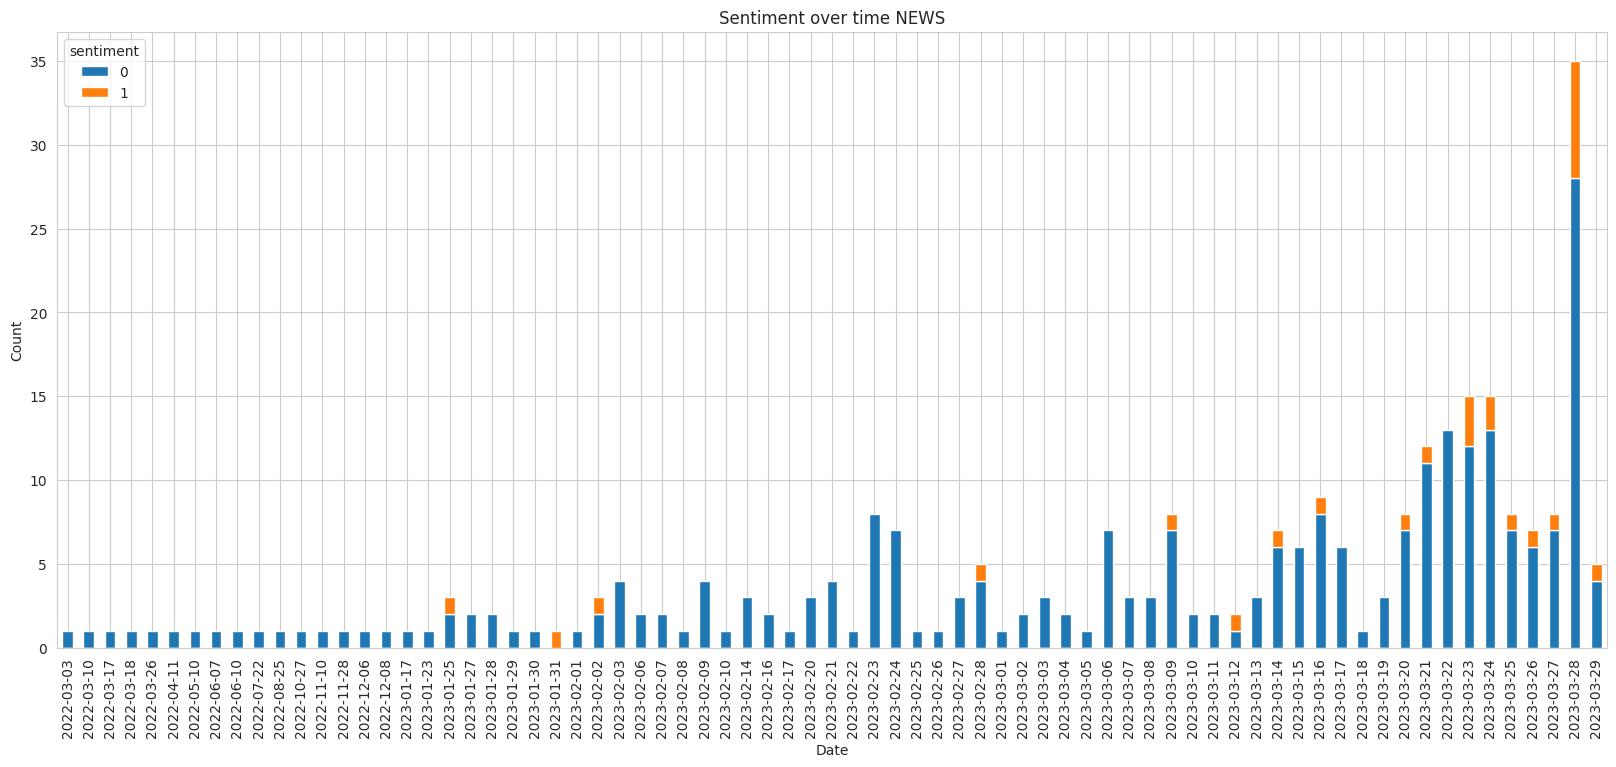

In [ ]:
# Group by date and sentiment, and count the number of occurrences
news_viz_grouped = news_viz_df.groupby(['Date', 'sentiment']).size().reset_index(name='counts')

# Pivot the dataframe to create separate columns for each sentiment
pivoted = news_viz_grouped.pivot(index='Date', columns='sentiment', values='counts').fillna(0)

# Plot a time series bar plot of the pivoted dataframe
# plt.figure(figsize = (20, 8))
pivoted.plot(kind='bar', stacked=True, figsize = (20, 8))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment over time NEWS')
plt.show()